# **Execução dos modelos de ML - TCC**

## **Importações Iniciais e Preparação do Ambiente**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import hdbscan

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import mutual_info_classif #Information gain
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
# random.seed(RANDOM_STATE)

In [ ]:
# -=+=- NodeRacer Exploratory -=+=-
df_mongoexpress = pd.read_csv('mongo-express.csv')
df_nedb = pd.read_csv('nedb.csv')
df_arc = pd.read_csv('node-archiver.csv')
df_obj = pd.read_csv('objection.js.csv')

# -=+=- NodeRacer Known bugs -=+=-
df_aka = pd.read_csv('agentkeepalive-23.csv')
df_fps = pd.read_csv('fiware-pep-steelskin.csv')
df_gho = pd.read_csv('WhiteboxGhost.csv')
df_mkd = pd.read_csv('node-mkdirp.csv')
# nes
df_nlf = pd.read_csv('node-logger-file-1.csv')
df_sio = pd.read_csv('socket.io-1862.csv')
df_del = pd.read_csv('del.csv')
df_lst = pd.read_csv('linter-stylint.csv')
df_nsc = pd.read_csv('node-simplecrawler-i298.csv')
df_xls = pd.read_csv('xlsx-extract.csv')

# -=+=- NodeRacer Open issues -=+=-
df_blueblird = pd.read_csv('bluebird-2.csv')
df_express_user = pd.read_csv('express-user.csv')
df_gpt = pd.read_csv('get-port.csv')
df_lvs = pd.read_csv('live-server-potential-race.csv')
df_sioc = pd.read_csv('socket.io-client.csv')

# -=+=- NodeRT Explore -=+=-
df_jsonfile = pd.read_csv('json-file-store-6aada66.csv')
df_jsonfs = pd.read_csv('json-fs-store-4e75c4f.csv')
df_ncp = pd.read_csv('ncp-6820b0f.csv')
df_write = pd.read_csv('write-f537eb6.csv')

# -=+=- Fs-Extra -=+=-
df_fsextra = pd.read_csv('fsextra.csv')


In [ ]:
df = pd.concat([df_mongoexpress, df_nedb, df_arc, df_obj,
                df_aka, df_fps, df_gho, df_mkd, df_nlf, df_sio,
                df_del, df_lst, df_nsc, df_xls,

                df_blueblird, df_express_user, df_gpt,
                df_lvs, df_sioc,

                df_jsonfile, df_jsonfs, df_ncp, df_write,

                df_fsextra], ignore_index=True)


df['HasEventRace'] = df['HasEventRace'].apply(lambda x: True if x == True or x == 'True' else False)

In [ ]:
pd.set_option('display.max_columns', None)

# df.head(20)
df

BenchmarkName                                       TestFilePath  \
0     mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1     mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
2     mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
3     mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
4     mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
...             ...                                                ...   
1662        fsextra  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1663        fsextra  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1664        fsextra  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1665        fsextra  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1666        fsextra  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   

                                           TestCaseName  \
0     BSON toBSON should convert documents with nati...   
1           BSON toBSON should convert ObjectID to BSON   
2            BSON toBSON should convert ISODate to BSON   
3          BSON toBSON should convert Timestamp to BSON   
4              BSON toBSON should convert DBRef to BSON   
...                                                 ...   
1662  util/stat should stop at src or root path and ...   
1663  utimes hasMillisResSync() should return a bool...   
1664  utimes timeRemoveMills() should remove millise...   
1665  utimes utimesMillis() should set the utimes w/...   
1666  utimes utimesMillis() should close open file d...   

      InvokeFunPre_Count_Raw  InvokeFunPre_Count_Normalized  \
0                         38                       0.007553   
1                         42                       0.009063   
2                         42                       0.009063   
3                         40                       0.008308   
4                         81                       0.023792   
...                      ...                            ...   
1662                     336                       0.017458   
1663                     219                       0.004108   
1664                     212                       0.003309   
1665                     234                       0.005819   
1666                     238                       0.006276   

      Invokes_with_callback_Raw  Invokes_with_callback_Normalized  \
0                             0                          0.000000   
1                             0                          0.000000   
2                             0                          0.000000   
3                             0                          0.000000   
4                             0                          0.000000   
...                         ...                               ...   
1662                         27                          0.011369   
1663                          6                          0.001421   
1664                          6                          0.001421   
1665                         10                          0.003316   
1666                         19                          0.007579   

      Cbs_Total_delay_ms_Raw  Cbs_Total_delay_ms_Normalized  \
0                   0.000000                       0.000000   
1                   0.000000                       0.000000   
2                   0.000000                       0.000000   
3                   0.000000                       0.000000   
4                   0.000000                       0.000000   
...                      ...                            ...   
1662             2651.692328                       0.089134   
1663              835.800389                       0.028035   
1664              907.484614                       0.030447   
1665              829.159410                       0.027812   
1666             1572.437159                       0.052821   

      Cb_Delays_Greater_Than_100_ms_Raw  \
0                     

In [ ]:
race_counts = df.groupby('BenchmarkName')['HasEventRace'].value_counts().unstack(fill_value=0)
print(race_counts)

HasEventRace                          False  True 
BenchmarkName                                     
Script do WhiteboxGhost                   0      1
Script do bluebird-2                      0      1
Script do express-user                    0      1
Script do get-port                        0      1
Script do linter-stylint                  0      1
Script do live-server-potential-race      0      1
Script do node-mkdirp                     0      1
agentkeepalive-23                        23      1
del                                       9      1
fiware-pep-steelskin                    209      1
fsextra                                 717      2
json-file-store-6aada66                  26      1
json-fs-store-4e75c4f                     6      1
mongo-express                            29      4
ncp-6820b0f                              11      4
nedb                                    328      2
node-archiver                            34      1
node-logger-file-1             

### **Métrica total_duration_s Normalizada**

In [ ]:
display(df[['BenchmarkName', 'TestCaseName', 'Total_duration_s']])

BenchmarkName                                       TestCaseName  \
0     mongo-express  BSON toBSON should convert documents with nati...   
1     mongo-express        BSON toBSON should convert ObjectID to BSON   
2     mongo-express         BSON toBSON should convert ISODate to BSON   
3     mongo-express       BSON toBSON should convert Timestamp to BSON   
4     mongo-express           BSON toBSON should convert DBRef to BSON   
...             ...                                                ...   
1662        fsextra  util/stat should stop at src or root path and ...   
1663        fsextra  utimes hasMillisResSync() should return a bool...   
1664        fsextra  utimes timeRemoveMills() should remove millise...   
1665        fsextra  utimes utimesMillis() should set the utimes w/...   
1666        fsextra  utimes utimesMillis() should close open file d...   

      Total_duration_s  
0               20.951  
1               19.103  
2               18.223  
3               18.548  
4               12.867  
...                ...  
1662             7.370  
1663             6.544  
1664             7.127  
1665             6.736  
1666             7.351  

[1667 rows x 3 columns]

In [ ]:
df = df.rename(columns={'Total_duration_s': 'Total_duration_s_Raw'})

scaler = MinMaxScaler()

df['Total_duration_s_Normalized'] = df.groupby('BenchmarkName')['Total_duration_s_Raw'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

In [ ]:
display(df[['BenchmarkName', 'TestCaseName', 'Total_duration_s_Raw', 'Total_duration_s_Normalized']])

BenchmarkName                                       TestCaseName  \
0     mongo-express  BSON toBSON should convert documents with nati...   
1     mongo-express        BSON toBSON should convert ObjectID to BSON   
2     mongo-express         BSON toBSON should convert ISODate to BSON   
3     mongo-express       BSON toBSON should convert Timestamp to BSON   
4     mongo-express           BSON toBSON should convert DBRef to BSON   
...             ...                                                ...   
1662        fsextra  util/stat should stop at src or root path and ...   
1663        fsextra  utimes hasMillisResSync() should return a bool...   
1664        fsextra  utimes timeRemoveMills() should remove millise...   
1665        fsextra  utimes utimesMillis() should set the utimes w/...   
1666        fsextra  utimes utimesMillis() should close open file d...   

      Total_duration_s_Raw  Total_duration_s_Normalized  
0                   20.951                     1.000000  
1                   19.103                     0.851447  
2                   18.223                     0.780707  
3                   18.548                     0.806833  
4                   12.867                     0.350161  
...                    ...                          ...  
1662                 7.370                     0.177976  
1663                 6.544                     0.066098  
1664                 7.127                     0.145063  
1665                 6.736                     0.092103  
1666                 7.351                     0.175403  

[1667 rows x 4 columns]

### **Normalização dos Script com base nos dados entre eles**
Essa etapa é importante para que nos dados do script os valores normalizados não fiquem todos com valor "1"

In [ ]:
column_pairs = [
    ('InvokeFunPre_Count_Raw', 'InvokeFunPre_Count_Normalized'),
    ('Invokes_with_callback_Raw', 'Invokes_with_callback_Normalized'),
    ('Cbs_Total_delay_ms_Raw', 'Cbs_Total_delay_ms_Normalized'),
    ('Cb_Delays_Greater_Than_100_ms_Raw', 'Cb_Delays_Greater_Than_100_ms_Normalized'),
    ('InvokesInterval_Greater_Than_100_ms_Raw', 'InvokesInterval_Greater_Than_100_ms_Normalized'),
    ('AsyncFunction_Count_Raw', 'AsyncFunction_Count_Normalized'),
    ('Await_Count_Raw', 'Await_Count_Normalized'),
    ('Unique_Asynchook_ids_Raw', 'Unique_Asynchook_ids_Normalized'),
    ('totalSettledPromises_Raw', 'totalSettledPromises_Normalized'),
    ('avgResolved_Raw', 'avgResolved_Normalized'),
    ('avgRejected_Raw', 'avgRejected_Normalized'),
    ('longestResolved_Raw', 'longestResolved_Normalized'),
    ('resolvedPercentage_Raw', 'resolvedPercentage_Normalized'),
    ('awaitIntervals_Raw', 'awaitIntervals_Normalized'),
    ('Total_duration_s_Raw', 'Total_duration_s_Normalized')
]

benchmarks_to_normalize = [
    'Script do WhiteboxGhost',
    'Script do bluebird-2',
    'Script do express-user',
    'Script do get-port',
    'Script do linter-stylint',
    'Script do live-server-potential-race',
    'Script do node-mkdirp'
]

for raw_col, normalized_col in column_pairs:
    all_raw_values = df[df['BenchmarkName'].isin(benchmarks_to_normalize)][raw_col].values.reshape(-1, 1)

    scaler = MinMaxScaler()
    scaler.fit(all_raw_values)

    for benchmark in benchmarks_to_normalize:
        benchmark_index = df[df['BenchmarkName'] == benchmark].index

        if not benchmark_index.empty:
            scaled_values = scaler.transform(
                df.loc[benchmark_index, [raw_col]].values
            )

            df.loc[benchmark_index, normalized_col] = scaled_values.flatten()

In [ ]:
df[df['BenchmarkName'].isin(benchmarks_to_normalize)].head(10)

BenchmarkName  \
680               Script do WhiteboxGhost   
681                 Script do node-mkdirp   
728              Script do linter-stylint   
824                  Script do bluebird-2   
825                Script do express-user   
826                    Script do get-port   
827  Script do live-server-potential-race   

                                          TestFilePath  \
680  /home/pedroubuntu/coisasNodeRT/datasetNodeRT/d...   
681  /home/pedroubuntu/coisasNodeRT/datasetNodeRT/d...   
728  /home/pedroubuntu/coisasNodeRT/datasetNodeRT/d...   
824  /home/pedroubuntu/coisasNodeRT/datasetNodeRT/d...   
825  /home/pedroubuntu/coisasNodeRT/datasetNodeRT/d...   
826  /home/pedroubuntu/coisasNodeRT/datasetNodeRT/d...   
827  /home/pedroubuntu/coisasNodeRT/datasetNodeRT/d...   

                                        TestCaseName  InvokeFunPre_Count_Raw  \
680               Script for Script do WhiteboxGhost                     111   
681                 Script for Script do node-mkdirp                      68   
728              Script for Script do linter-stylint                      41   
824                  Script for Script do bluebird-2                       8   
825                Script for Script do express-user                      76   
826                    Script for Script do get-port                     145   
827  Script for Script do live-server-potential-race                      28   

     InvokeFunPre_Count_Normalized  Invokes_with_callback_Raw  \
680                       0.751825                         20   
681                       0.437956                         24   
728                       0.240876                          5   
824                       0.000000                          3   
825                       0.496350                         15   
826                       1.000000                         30   
827                       0.145985                          0   

     Invokes_with_callback_Normalized  Cbs_Total_delay_ms_Raw  \
680                          0.666667             8157.097285   
681                          0.800000              907.161866   
728                          0.166667            23848.799948   
824                          0.100000             2025.117037   
825                          0.500000             5304.749515   
826                          1.000000             1110.993801   
827                          0.000000                0.000000   

     Cbs_Total_delay_ms_Normalized  Cb_Delays_Greater_Than_100_ms_Raw  \
680                       0.342034                                 15   
681                       0.038038                                  5   
728                       1.000000                                  5   
824                       0.084915                                  2   
825                       0.222433                                 11   
826                       0.046585                                  4   
827                       0.000000                                  0   

     Cb_Delays_Greater_Than_100_ms_Normalized  \
680                                  1.000000   
681                                  0.333333   
728                                  0.333333   
824                                  0.133333   
825                                  0.733333   
826                                  0.266667   
827                                  0.000000   

     InvokesInterval_Greater_Than_100_ms_Raw  \
680                                        3   
681                                        1   
728                                        1   
824                                        1   
825                                        9   
826                                       10   
827                                        4   

     InvokesInterval_Greater_Than_100_ms_Normalized  AsyncFunction_Count_Raw  \
680                                        0.222222                        0

### **Normalização Geral de Todas Colunas de Todo Dataset**

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude = ['HasEventRace']
numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]

scaler = MinMaxScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

BenchmarkName                                       TestFilePath  \
0  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
2  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
3  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
4  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   

                                        TestCaseName  InvokeFunPre_Count_Raw  \
0  BSON toBSON should convert documents with nati...                0.000180   
1        BSON toBSON should convert ObjectID to BSON                0.000204   
2         BSON toBSON should convert ISODate to BSON                0.000204   
3       BSON toBSON should convert Timestamp to BSON                0.000192   
4           BSON toBSON should convert DBRef to BSON                0.000439   

   InvokeFunPre_Count_Normalized  Invokes_with_callback_Raw  \
0                       0.007553                        0.0   
1                       0.009063                        0.0   
2                       0.009063                        0.0   
3                       0.008308                        0.0   
4                       0.023792                        0.0   

   Invokes_with_callback_Normalized  Cbs_Total_delay_ms_Raw  \
0                               0.0                     0.0   
1                               0.0                     0.0   
2                               0.0                     0.0   
3                               0.0                     0.0   
4                               0.0                     0.0   

   Cbs_Total_delay_ms_Normalized  Cb_Delays_Greater_Than_100_ms_Raw  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   Cb_Delays_Greater_Than_100_ms_Normalized  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   InvokesInterval_Greater_Than_100_ms_Raw  \
0                                 0.034483   
1                                 0.022989   
2                                 0.034483   
3                                 0.034483   
4                                 0.034483   

   InvokesInterval_Greater_Than_100_ms_Normalized  AsyncFunction_Count_Raw  \
0                                           0.050                      0.0   
1                                           0.025                      0.0   
2                                           0.050                      0.0   
3                                           0.050                      0.0   
4                                           0.050                      0.0   

   AsyncFunction_Count_Normalized  Await_Count_Raw  Await_Count_Normalized  \
0                             0.0              0.0                     0.0   
1                             0.0              0.0                     0.0   
2                             0.0              0.0                     0.0   
3                             0.0              0.0                     0.0   
4                             0.0              0.0                     0.0   

   Unique_Asynchook_ids_Raw  Unique_Asynchook_ids_Normalized  \
0                  0.000173                              0.0   
1                  0.000173                              0.0   
2                  0.000173                              0.0   
3                  0.000173                              0.0   
4                  0.000173                              0.0   

   totalSettledPromises_Raw

<a id="rq2"></a>
## **Cálculo do Information Gain - QP2**

In [ ]:
df['Random_Col_1'] = np.random.rand(len(df))
df['Random_Col_2'] = np.random.rand(len(df))
df['Random_Col_3'] = np.random.rand(len(df))

In [ ]:
df.head()

BenchmarkName                                       TestFilePath  \
0  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
2  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
3  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
4  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   

                                        TestCaseName  InvokeFunPre_Count_Raw  \
0  BSON toBSON should convert documents with nati...                0.000180   
1        BSON toBSON should convert ObjectID to BSON                0.000204   
2         BSON toBSON should convert ISODate to BSON                0.000204   
3       BSON toBSON should convert Timestamp to BSON                0.000192   
4           BSON toBSON should convert DBRef to BSON                0.000439   

   InvokeFunPre_Count_Normalized  Invokes_with_callback_Raw  \
0                       0.007553                        0.0   
1                       0.009063                        0.0   
2                       0.009063                        0.0   
3                       0.008308                        0.0   
4                       0.023792                        0.0   

   Invokes_with_callback_Normalized  Cbs_Total_delay_ms_Raw  \
0                               0.0                     0.0   
1                               0.0                     0.0   
2                               0.0                     0.0   
3                               0.0                     0.0   
4                               0.0                     0.0   

   Cbs_Total_delay_ms_Normalized  Cb_Delays_Greater_Than_100_ms_Raw  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   Cb_Delays_Greater_Than_100_ms_Normalized  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   InvokesInterval_Greater_Than_100_ms_Raw  \
0                                 0.034483   
1                                 0.022989   
2                                 0.034483   
3                                 0.034483   
4                                 0.034483   

   InvokesInterval_Greater_Than_100_ms_Normalized  AsyncFunction_Count_Raw  \
0                                           0.050                      0.0   
1                                           0.025                      0.0   
2                                           0.050                      0.0   
3                                           0.050                      0.0   
4                                           0.050                      0.0   

   AsyncFunction_Count_Normalized  Await_Count_Raw  Await_Count_Normalized  \
0                             0.0              0.0                     0.0   
1                             0.0              0.0                     0.0   
2                             0.0              0.0                     0.0   
3                             0.0              0.0                     0.0   
4                             0.0              0.0                     0.0   

   Unique_Asynchook_ids_Raw  Unique_Asynchook_ids_Normalized  \
0                  0.000173                              0.0   
1                  0.000173                              0.0   
2                  0.000173                              0.0   
3                  0.000173                              0.0   
4                  0.000173                              0.0   

   totalSettledPromises_Raw

In [ ]:
features = ['InvokeFunPre_Count_Raw','InvokeFunPre_Count_Normalized',
            'Invokes_with_callback_Raw','Invokes_with_callback_Normalized',
            'Cbs_Total_delay_ms_Raw','Cbs_Total_delay_ms_Normalized',
            'Cb_Delays_Greater_Than_100_ms_Raw','Cb_Delays_Greater_Than_100_ms_Normalized',
            'InvokesInterval_Greater_Than_100_ms_Raw','InvokesInterval_Greater_Than_100_ms_Normalized',
            'AsyncFunction_Count_Raw','AsyncFunction_Count_Normalized',
            'Await_Count_Raw','Await_Count_Normalized',
            'Unique_Asynchook_ids_Raw','Unique_Asynchook_ids_Normalized',
            'Total_duration_s_Raw', 'Total_duration_s_Normalized',

            'totalSettledPromises_Raw', 'totalSettledPromises_Normalized',
            'avgResolved_Raw', 'avgResolved_Normalized',
            'avgRejected_Raw', 'avgRejected_Normalized',
            'longestResolved_Raw', 'longestResolved_Normalized',
            'resolvedPercentage_Raw', 'resolvedPercentage_Normalized',
            'awaitIntervals_Raw', 'awaitIntervals_Normalized',


            'Random_Col_1','Random_Col_2','Random_Col_3'
            ]

target = ['HasEventRace']

In [ ]:
X = df[features]

y = df[target]

information_gains = mutual_info_classif(X, y, random_state=42)

ig_results = pd.DataFrame({
    'Feature': features,
    'Information Gain': information_gains
}).sort_values(by='Information Gain', ascending=False)

ig_results

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature  Information Gain
9   InvokesInterval_Greater_Than_100_ms_Normalized          0.023190
8          InvokesInterval_Greater_Than_100_ms_Raw          0.016163
0                           InvokeFunPre_Count_Raw          0.015596
24                             longestResolved_Raw          0.014634
7         Cb_Delays_Greater_Than_100_ms_Normalized          0.012667
18                        totalSettledPromises_Raw          0.011764
3                 Invokes_with_callback_Normalized          0.011685
17                     Total_duration_s_Normalized          0.011163
15                 Unique_Asynchook_ids_Normalized          0.009132
1                    InvokeFunPre_Count_Normalized          0.009054
5                    Cbs_Total_delay_ms_Normalized          0.008118
25                      longestResolved_Normalized          0.005691
27                   resolvedPercentage_Normalized          0.005653
14                        Unique_Asynchook_ids_Raw          0.005303
26                          resolvedPercentage_Raw          0.003962
20                                 avgResolved_Raw          0.003828
11                  AsyncFunction_Count_Normalized          0.003596
2                        Invokes_with_callback_Raw          0.003236
21                          avgResolved_Normalized          0.003146
4                           Cbs_Total_delay_ms_Raw          0.002707
16                            Total_duration_s_Raw          0.001806
19                 totalSettledPromises_Normalized          0.001579
13                          Await_Count_Normalized          0.001306
28                              awaitIntervals_Raw          0.000791
23                          avgRejected_Normalized          0.000081
31                                    Random_Col_2          0.000021
10                         AsyncFunction_Count_Raw          0.000000
6                Cb_Delays_Greater_Than_100_ms_Raw          0.000000
12                                 Await_Count_Raw          0.000000
22                                 avgRejected_Raw          0.000000
29                       awaitIntervals_Normalized          0.000000
30                                    Random_Col_1          0.000000
32                                    Random_Col_3          0.000000

In [ ]:
# df = df.drop(columns=['Random_Col_1', 'Random_Col_2', 'Random_Col_3'])
display(df.head())

BenchmarkName                                       TestFilePath  \
0  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
2  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
3  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
4  mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   

                                        TestCaseName  InvokeFunPre_Count_Raw  \
0  BSON toBSON should convert documents with nati...                0.000180   
1        BSON toBSON should convert ObjectID to BSON                0.000204   
2         BSON toBSON should convert ISODate to BSON                0.000204   
3       BSON toBSON should convert Timestamp to BSON                0.000192   
4           BSON toBSON should convert DBRef to BSON                0.000439   

   InvokeFunPre_Count_Normalized  Invokes_with_callback_Raw  \
0                       0.007553                        0.0   
1                       0.009063                        0.0   
2                       0.009063                        0.0   
3                       0.008308                        0.0   
4                       0.023792                        0.0   

   Invokes_with_callback_Normalized  Cbs_Total_delay_ms_Raw  \
0                               0.0                     0.0   
1                               0.0                     0.0   
2                               0.0                     0.0   
3                               0.0                     0.0   
4                               0.0                     0.0   

   Cbs_Total_delay_ms_Normalized  Cb_Delays_Greater_Than_100_ms_Raw  \
0                            0.0                                0.0   
1                            0.0                                0.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                0.0   

   Cb_Delays_Greater_Than_100_ms_Normalized  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   InvokesInterval_Greater_Than_100_ms_Raw  \
0                                 0.034483   
1                                 0.022989   
2                                 0.034483   
3                                 0.034483   
4                                 0.034483   

   InvokesInterval_Greater_Than_100_ms_Normalized  AsyncFunction_Count_Raw  \
0                                           0.050                      0.0   
1                                           0.025                      0.0   
2                                           0.050                      0.0   
3                                           0.050                      0.0   
4                                           0.050                      0.0   

   AsyncFunction_Count_Normalized  Await_Count_Raw  Await_Count_Normalized  \
0                             0.0              0.0                     0.0   
1                             0.0              0.0                     0.0   
2                             0.0              0.0                     0.0   
3                             0.0              0.0                     0.0   
4                             0.0              0.0                     0.0   

   Unique_Asynchook_ids_Raw  Unique_Asynchook_ids_Normalized  \
0                  0.000173                              0.0   
1                  0.000173                              0.0   
2                  0.000173                              0.0   
3                  0.000173                              0.0   
4                  0.000173                              0.0   

   totalSettledPromises_Raw

## **Amostragem 3 para 1**
(Proporção está 3 False para 1 True)

In [ ]:
df_true = df[df["HasEventRace"] == True]
df_false = df[df["HasEventRace"] == False]

df_false_sampled = df_false.sample(n=3 * len(df_true), random_state=42)
df_sampled = pd.concat([df_true, df_false_sampled])

df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

print("Value counts for original DataFrame:")
print(df['HasEventRace'].value_counts())
print("\nValue counts for sampled DataFrame:")
print(df_sampled['HasEventRace'].value_counts())

Value counts for original DataFrame:
HasEventRace
False    1635
True       32
Name: count, dtype: int64

Value counts for sampled DataFrame:
HasEventRace
False    96
True     32
Name: count, dtype: int64


In [ ]:
features = ['InvokeFunPre_Count_Raw','InvokeFunPre_Count_Normalized',
            'Invokes_with_callback_Raw','Invokes_with_callback_Normalized',
            'Cbs_Total_delay_ms_Raw','Cbs_Total_delay_ms_Normalized',
            'Cb_Delays_Greater_Than_100_ms_Raw','Cb_Delays_Greater_Than_100_ms_Normalized',
            'InvokesInterval_Greater_Than_100_ms_Raw','InvokesInterval_Greater_Than_100_ms_Normalized',
            'AsyncFunction_Count_Raw','AsyncFunction_Count_Normalized',
            'Await_Count_Raw','Await_Count_Normalized',
            'Unique_Asynchook_ids_Raw','Unique_Asynchook_ids_Normalized',
            'Total_duration_s_Raw', 'Total_duration_s_Normalized',

            'totalSettledPromises_Raw', 'totalSettledPromises_Normalized',
            'avgResolved_Raw', 'avgResolved_Normalized',
            'avgRejected_Raw', 'avgRejected_Normalized',
            'longestResolved_Raw', 'longestResolved_Normalized',
            'resolvedPercentage_Raw', 'resolvedPercentage_Normalized',
            'awaitIntervals_Raw', 'awaitIntervals_Normalized',
            ]
X = df_sampled[features]

y = df_sampled[target]

information_gains = mutual_info_classif(X, y, random_state=42)

ig_results = pd.DataFrame({
    'Feature': features,
    'Information Gain': information_gains
}).sort_values(by='Information Gain', ascending=False)

ig_results

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature  Information Gain
3                 Invokes_with_callback_Normalized          0.189244
8          InvokesInterval_Greater_Than_100_ms_Raw          0.155170
9   InvokesInterval_Greater_Than_100_ms_Normalized          0.141505
0                           InvokeFunPre_Count_Raw          0.131795
14                        Unique_Asynchook_ids_Raw          0.111738
24                             longestResolved_Raw          0.105713
7         Cb_Delays_Greater_Than_100_ms_Normalized          0.103349
17                     Total_duration_s_Normalized          0.101219
26                          resolvedPercentage_Raw          0.101034
18                        totalSettledPromises_Raw          0.094263
1                    InvokeFunPre_Count_Normalized          0.076043
25                      longestResolved_Normalized          0.069892
15                 Unique_Asynchook_ids_Normalized          0.064757
6                Cb_Delays_Greater_Than_100_ms_Raw          0.055719
2                        Invokes_with_callback_Raw          0.055609
5                    Cbs_Total_delay_ms_Normalized          0.051707
4                           Cbs_Total_delay_ms_Raw          0.049366
19                 totalSettledPromises_Normalized          0.030986
21                          avgResolved_Normalized          0.027316
29                       awaitIntervals_Normalized          0.024321
22                                 avgRejected_Raw          0.021194
13                          Await_Count_Normalized          0.020704
16                            Total_duration_s_Raw          0.015880
23                          avgRejected_Normalized          0.015169
20                                 avgResolved_Raw          0.010378
27                   resolvedPercentage_Normalized          0.005167
12                                 Await_Count_Raw          0.000700
11                  AsyncFunction_Count_Normalized          0.000000
10                         AsyncFunction_Count_Raw          0.000000
28                              awaitIntervals_Raw          0.000000

## **Gráficos: Heatmap e PCA**

In [ ]:
x = df_sampled.drop(columns=["BenchmarkName", "TestFilePath", "TestCaseName", "HasEventRace"])

y = df_sampled["HasEventRace"].apply(lambda x: 1 if x == True else 0)

x_scaled = x

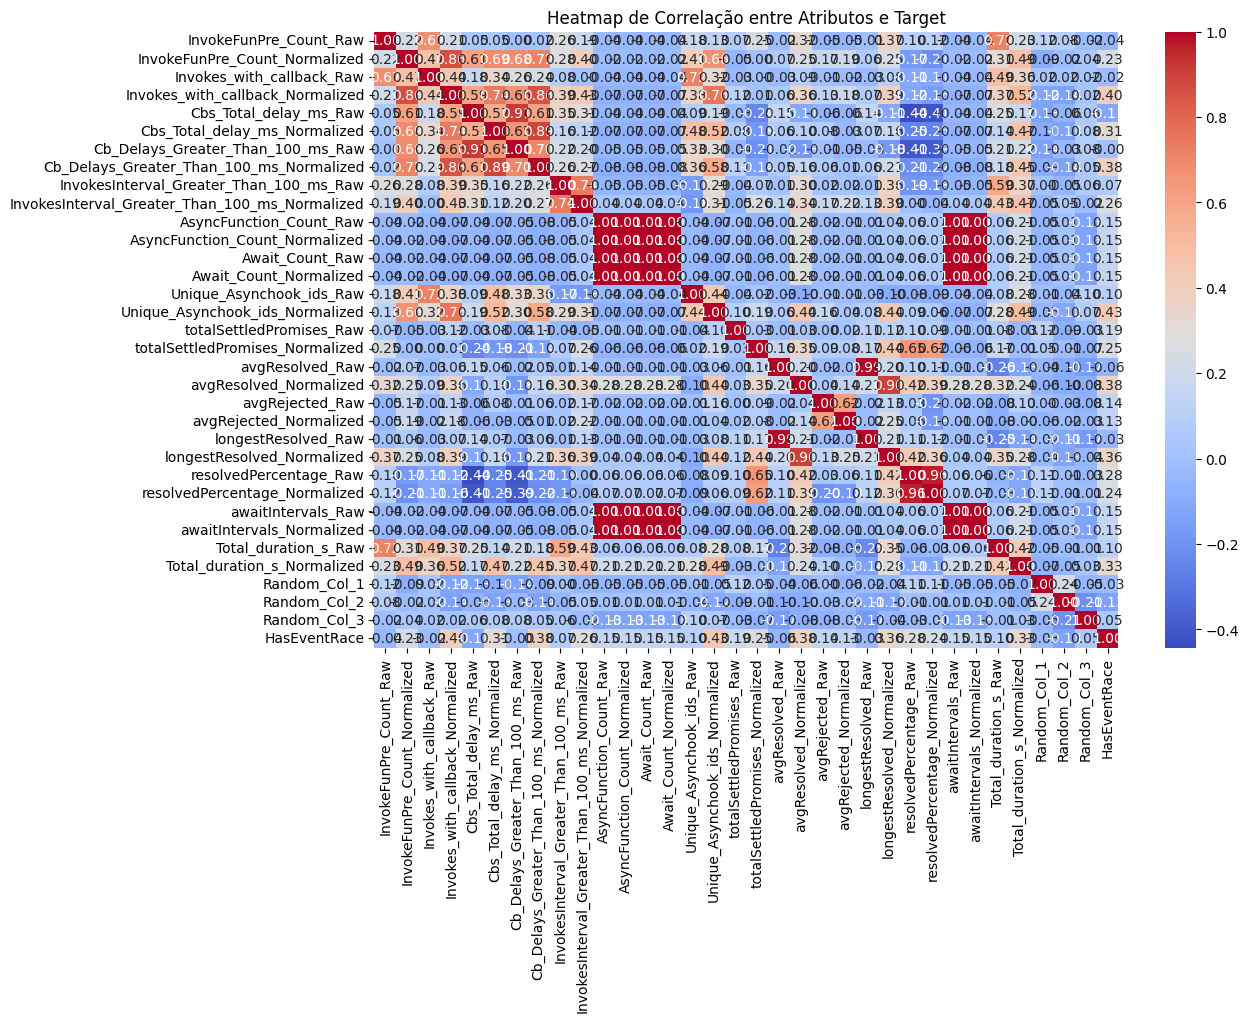

In [ ]:
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

x_scaled_df['HasEventRace'] = y

correlation_matrix = x_scaled_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap de Correlação entre Atributos e Target")
plt.show()

In [ ]:
df_pca = df.drop(columns=['TestFilePath', 'TestCaseName', 'Random_Col_1', 'Random_Col_2', 'Random_Col_3'])


In [ ]:
df_pca

BenchmarkName  InvokeFunPre_Count_Raw  InvokeFunPre_Count_Normalized  \
0     mongo-express                0.000180                       0.007553   
1     mongo-express                0.000204                       0.009063   
2     mongo-express                0.000204                       0.009063   
3     mongo-express                0.000192                       0.008308   
4     mongo-express                0.000439                       0.023792   
...             ...                     ...                            ...   
1662        fsextra                0.001971                       0.017458   
1663        fsextra                0.001268                       0.004108   
1664        fsextra                0.001226                       0.003309   
1665        fsextra                0.001358                       0.005819   
1666        fsextra                0.001382                       0.006276   

      Invokes_with_callback_Raw  Invokes_with_callback_Normalized  \
0                      0.000000                          0.000000   
1                      0.000000                          0.000000   
2                      0.000000                          0.000000   
3                      0.000000                          0.000000   
4                      0.000000                          0.000000   
...                         ...                               ...   
1662                   0.002335                          0.011369   
1663                   0.000519                          0.001421   
1664                   0.000519                          0.001421   
1665                   0.000865                          0.003316   
1666                   0.001643                          0.007579   

      Cbs_Total_delay_ms_Raw  Cbs_Total_delay_ms_Normalized  \
0                   0.000000                       0.000000   
1                   0.000000                       0.000000   
2                   0.000000                       0.000000   
3                   0.000000                       0.000000   
4                   0.000000                       0.000000   
...                      ...                            ...   
1662                0.001598                       0.089134   
1663                0.000504                       0.028035   
1664                0.000547                       0.030447   
1665                0.000500                       0.027812   
1666                0.000948                       0.052821   

      Cb_Delays_Greater_Than_100_ms_Raw  \
0                              0.000000   
1                              0.000000   
2                              0.000000   
3                              0.000000   
4                              0.000000   
...                                 ...   
1662                           0.004975   
1663                           0.001990   
1664                           0.002985   
1665                           0.002985   
1666                           0.003980   

      Cb_Delays_Greater_Than_100_ms_Normalized  \
0                                     0.000000   
1                                     0.000000   
2                                     0.000000   
3                                     0.000000   
4                                     0.000000   
...                                        ...   
1662                                  0.102041   
1663                                  0.040816   
1664                                  0.061224   
1665                                  0.061224   
1666                                  0.081633   

      InvokesInterval_Greater_Than_100_ms_Raw  \
0                                    0.034483   
1                                    0.022989   
2                                    0.034483   
3                                    0.034483   
4                                    0.034483   
...                                       ...   
1662                  

/tmp/ipython-input-1378776627.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', num_benchmarks)


Análise PCA:

Variância explicada por componente:
Componente 1: 34.91%
Componente 2: 25.64%
Total acumulado: 60.55%

Distribuição de pontos:
Total de pontos: 128
Pontos com Event Race: 32 (25.0%)
Pontos sem Event Race: 96 (75.0%)

Distribuição por Benchmark:
fiware-pep-steelskin: 18 pontos (1 com Event Race)
fsextra: 43 pontos (2 com Event Race)
Script do express-user: 1 pontos (1 com Event Race)
nedb: 27 pontos (2 com Event Race)
ncp-6820b0f: 4 pontos (4 com Event Race)
Script do bluebird-2: 1 pontos (1 com Event Race)
Script do WhiteboxGhost: 1 pontos (1 com Event Race)
Script do node-mkdirp: 1 pontos (1 com Event Race)
write-f537eb6: 2 pontos (1 com Event Race)
mongo-express: 5 pontos (4 com Event Race)
node-logger-file-1: 2 pontos (1 com Event Race)
json-fs-store-4e75c4f: 1 pontos (1 com Event Race)
objection.js: 4 pontos (1 com Event Race)
Script do linter-stylint: 1 pontos (1 com Event Race)
socket.io-client: 5 pontos (1 com Event Race)
node-archiver: 2 pontos (1 com Event Race)


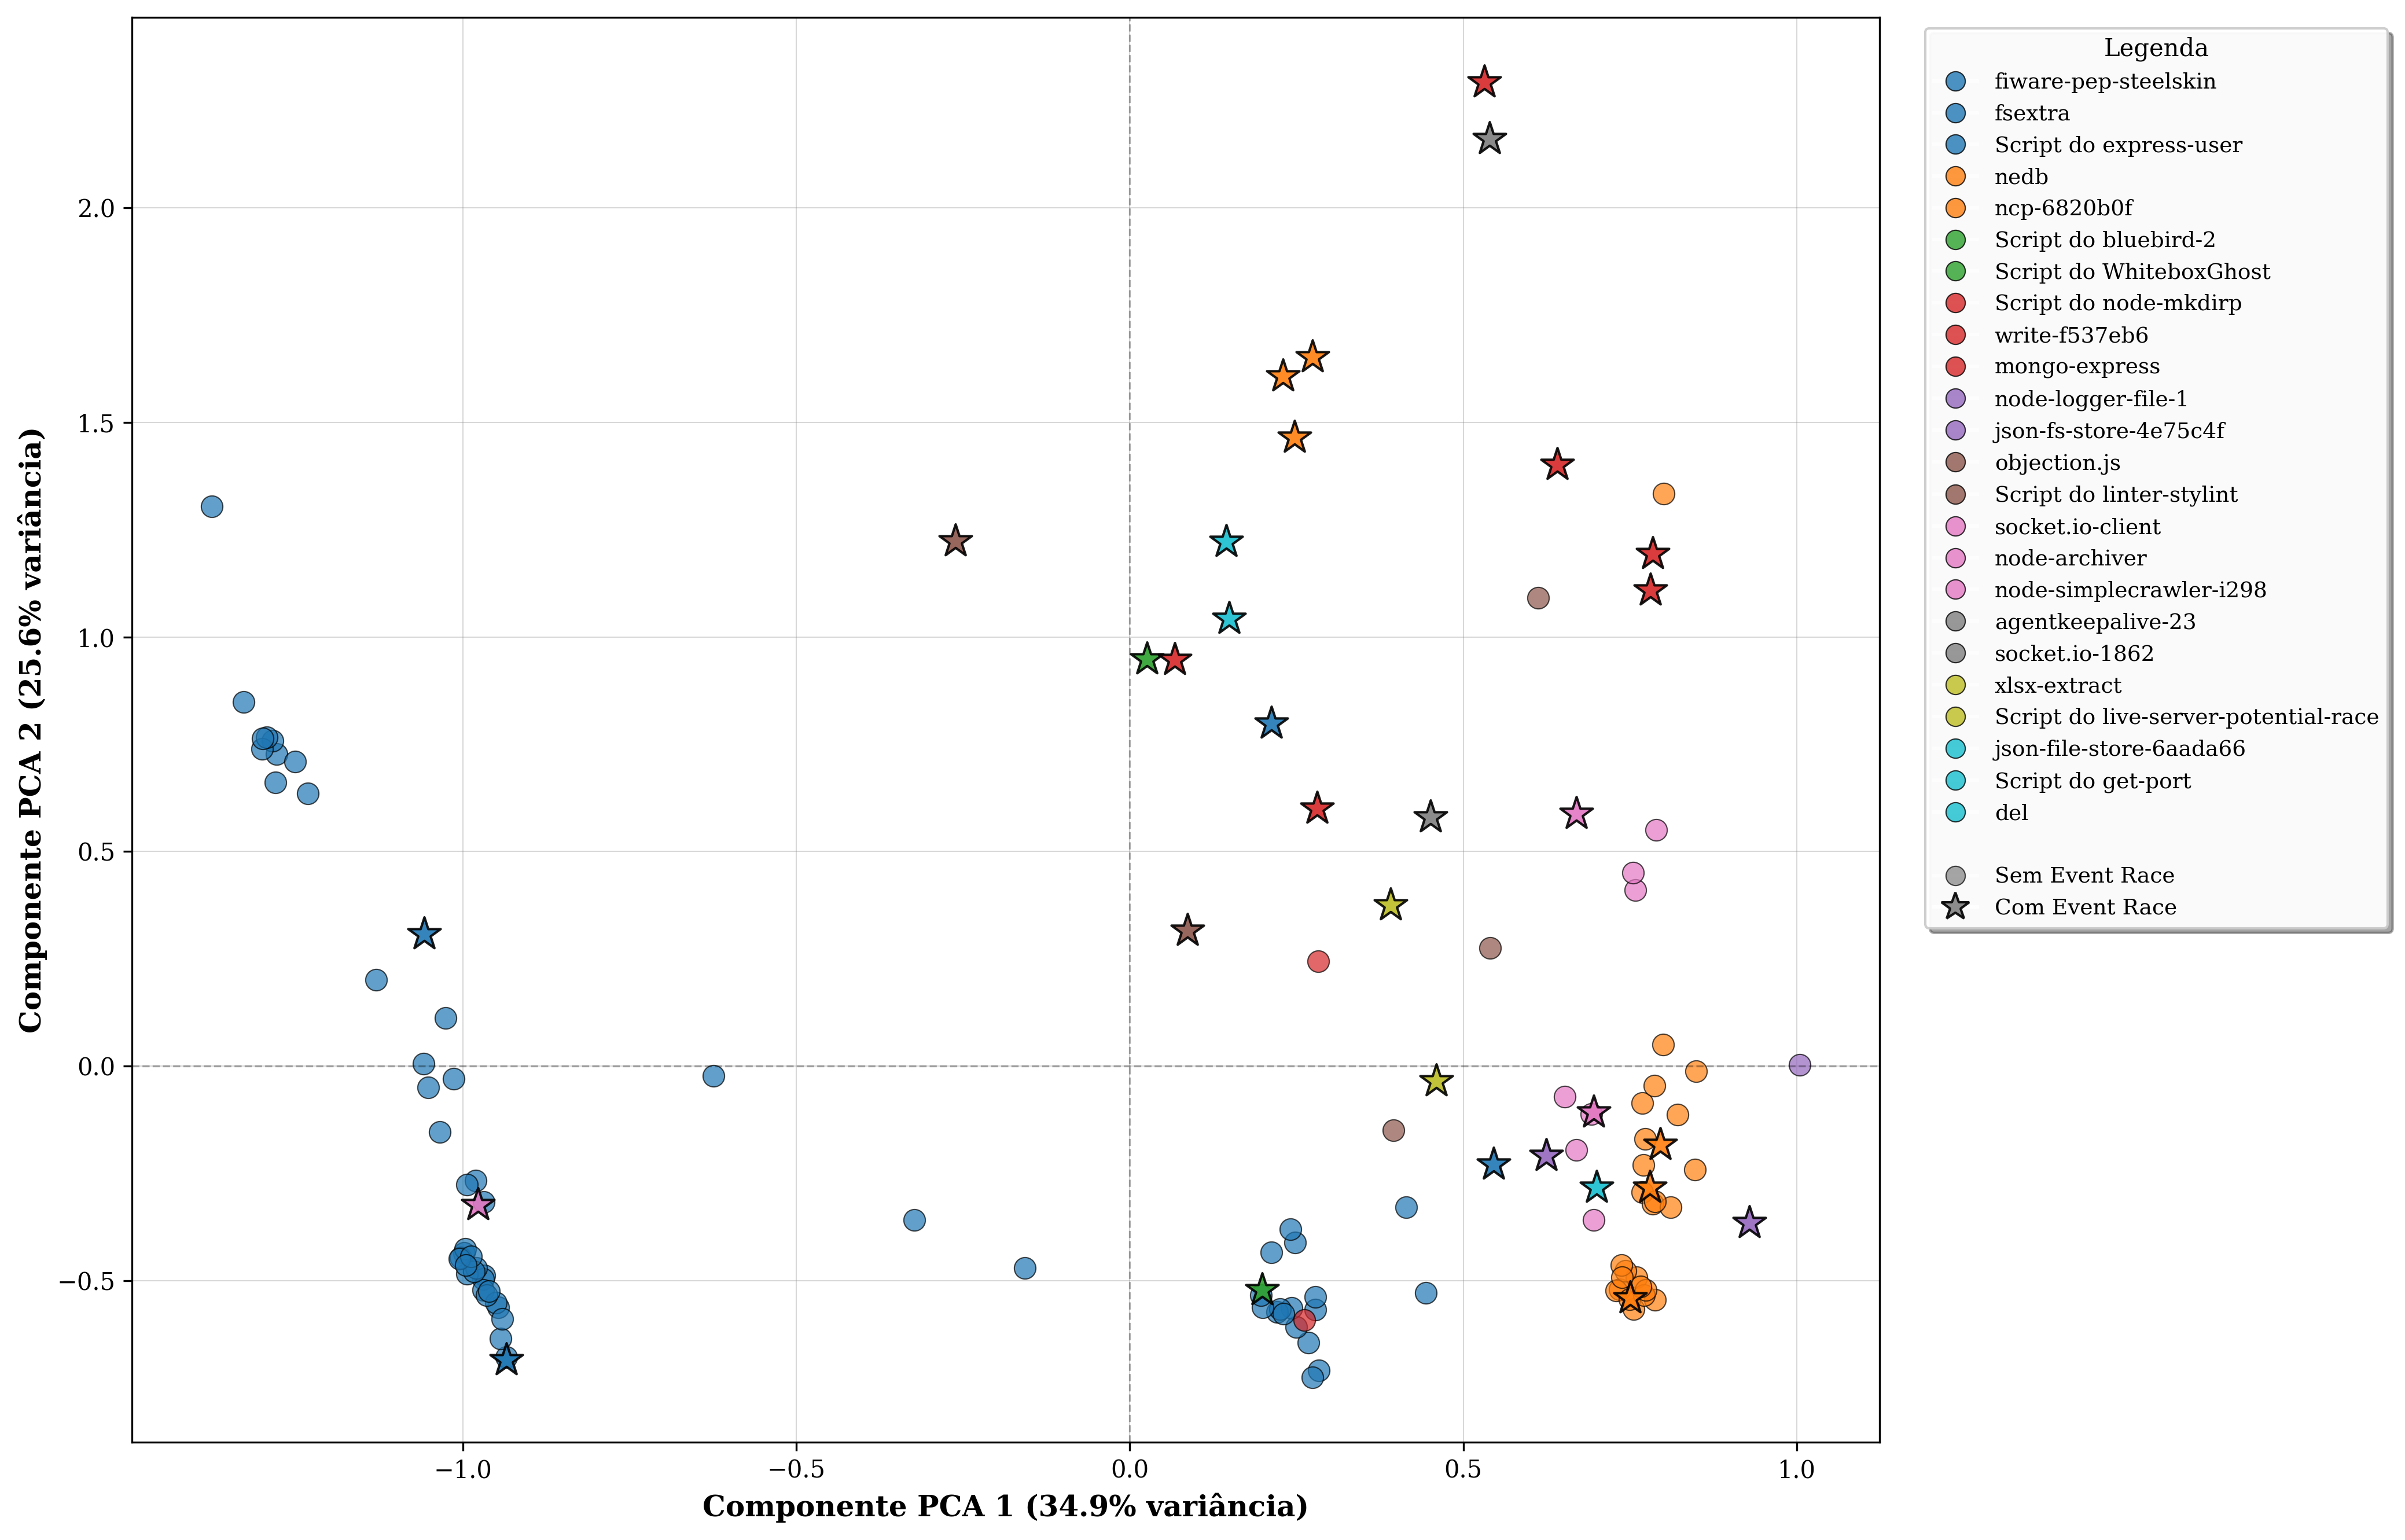

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

plt.style.use('default')
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['grid.alpha'] = 0.3

numeric_columns = df_sampled.select_dtypes(include=[np.number]).columns
df_numeric = df_sampled[numeric_columns]

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_numeric)

has_event_mask = df_sampled['HasEventRace'] == True

benchmark_names = df_sampled['BenchmarkName'].unique()
num_benchmarks = len(benchmark_names)

cores_profissionais = [
    '#4682B4',  # Azul aço
    '#FFA07A',  # Salmão claro
    '#32CD32',  # Verde lima
    '#708090',  # Cinza ardósia
    '#9370DB',  # Púrpura médio
    '#20B2AA',  # Turquesa claro
    '#FF6347',  # Tomate
    '#4169E1',  # Azul royal
    '#FFD700',  # Ouro
    '#8B4513',  # Marrom sela
]

if num_benchmarks <= len(cores_profissionais):
    benchmark_to_color = {name: cores_profissionais[i] for i, name in enumerate(benchmark_names)}
else:
    cmap = plt.cm.get_cmap('tab10', num_benchmarks)
    benchmark_to_color = {name: cmap(i) for i, name in enumerate(benchmark_names)}

fig, ax = plt.subplots(figsize=(14, 9), dpi=300)

for benchmark_name in benchmark_names:
    mask = (df_sampled['BenchmarkName'] == benchmark_name) & (~has_event_mask)
    if mask.any():
        ax.scatter(pca_data[mask, 0], pca_data[mask, 1],
                  c=[benchmark_to_color[benchmark_name]],
                  s=80,
                  marker='o',
                  alpha=0.7,
                  edgecolor='black',
                  linewidth=0.5)

for benchmark_name in benchmark_names:
    mask = (df_sampled['BenchmarkName'] == benchmark_name) & (has_event_mask)
    if mask.any():
        ax.scatter(pca_data[mask, 0], pca_data[mask, 1],
                  c=[benchmark_to_color[benchmark_name]],
                  s=200,
                  marker='*',
                  alpha=0.9,
                  edgecolor='black',
                  linewidth=1.0)

ax.set_xlabel(f'Componente PCA 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variância)',
             fontsize=12, fontweight='bold')
ax.set_ylabel(f'Componente PCA 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variância)',
             fontsize=12, fontweight='bold')

ax.tick_params(axis='both', which='major', labelsize=10)

ax.grid(True, linestyle='-', alpha=0.3, color='gray', linewidth=0.5)
ax.set_axisbelow(True)

ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.3)
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8, alpha=0.3)

for spine in ax.spines.values():
    spine.set_linewidth(0.8)
    spine.set_color('black')

legend_elements = []

for benchmark_name in benchmark_names:
    legend_elements.append(
        Line2D([0], [0], marker='o', color='w',
               markerfacecolor=benchmark_to_color[benchmark_name],
               markeredgecolor='black', markeredgewidth=0.5,
               markersize=8, label=benchmark_name, alpha=0.8)
    )

legend_elements.append(Line2D([0], [0], color='none', label=''))

legend_elements.append(
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor='gray', markeredgecolor='black',
           markeredgewidth=0.5, markersize=8,
           label='Sem Event Race', alpha=0.7)
)
legend_elements.append(
    Line2D([0], [0], marker='*', color='w',
           markerfacecolor='gray', markeredgecolor='black',
           markeredgewidth=1.0, markersize=12,
           label='Com Event Race', alpha=0.9)
)

legend = ax.legend(handles=legend_elements,
                  bbox_to_anchor=(1.02, 1),
                  loc='upper left',
                  frameon=True,
                  fancybox=True,
                  shadow=True,
                  fontsize=9,
                  framealpha=0.95,
                  title='Legenda',
                  title_fontsize=10)

plt.tight_layout()

print("Análise PCA:")
print(f"\nVariância explicada por componente:")
print(f"Componente 1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Componente 2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total acumulado: {sum(pca.explained_variance_ratio_)*100:.2f}%")

print(f"\nDistribuição de pontos:")
print(f"Total de pontos: {len(df_sampled)}")
print(f"Pontos com Event Race: {has_event_mask.sum()} ({has_event_mask.sum()/len(df_sampled)*100:.1f}%)")
print(f"Pontos sem Event Race: {(~has_event_mask).sum()} ({(~has_event_mask).sum()/len(df_sampled)*100:.1f}%)")

print(f"\nDistribuição por Benchmark:")
for benchmark_name in benchmark_names:
    total = (df_sampled['BenchmarkName'] == benchmark_name).sum()
    with_race = ((df_sampled['BenchmarkName'] == benchmark_name) & has_event_mask).sum()
    print(f"{benchmark_name}: {total} pontos ({with_race} com Event Race)")

# plt.savefig('pca_benchmark_analysis.png', dpi=300, bbox_inches='tight',
#            facecolor='white', edgecolor='none')
# plt.savefig('pca_benchmark_analysis.pdf', bbox_inches='tight',
#            facecolor='white', edgecolor='none')

plt.show()

/tmp/ipython-input-3500544506.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', num_benchmarks)


Análise PCA:

Variância explicada por componente:
Componente 1: 51.76%
Componente 2: 22.81%
Total acumulado: 74.57%

Distribuição de pontos:
Total de pontos: 1667
Pontos com Event Race: 32 (1.9%)
Pontos sem Event Race: 1635 (98.1%)

Distribuição por Benchmark:
mongo-express: 33 pontos (4 com Event Race)
nedb: 330 pontos (2 com Event Race)
node-archiver: 35 pontos (1 com Event Race)
objection.js: 48 pontos (1 com Event Race)
agentkeepalive-23: 24 pontos (1 com Event Race)
fiware-pep-steelskin: 210 pontos (1 com Event Race)
Script do WhiteboxGhost: 1 pontos (1 com Event Race)
Script do node-mkdirp: 1 pontos (1 com Event Race)
node-logger-file-1: 10 pontos (1 com Event Race)
socket.io-1862: 26 pontos (1 com Event Race)
del: 10 pontos (1 com Event Race)
Script do linter-stylint: 1 pontos (1 com Event Race)
node-simplecrawler-i298: 81 pontos (1 com Event Race)
xlsx-extract: 14 pontos (1 com Event Race)
Script do bluebird-2: 1 pontos (1 com Event Race)
Script do express-user: 1 pontos (1 com

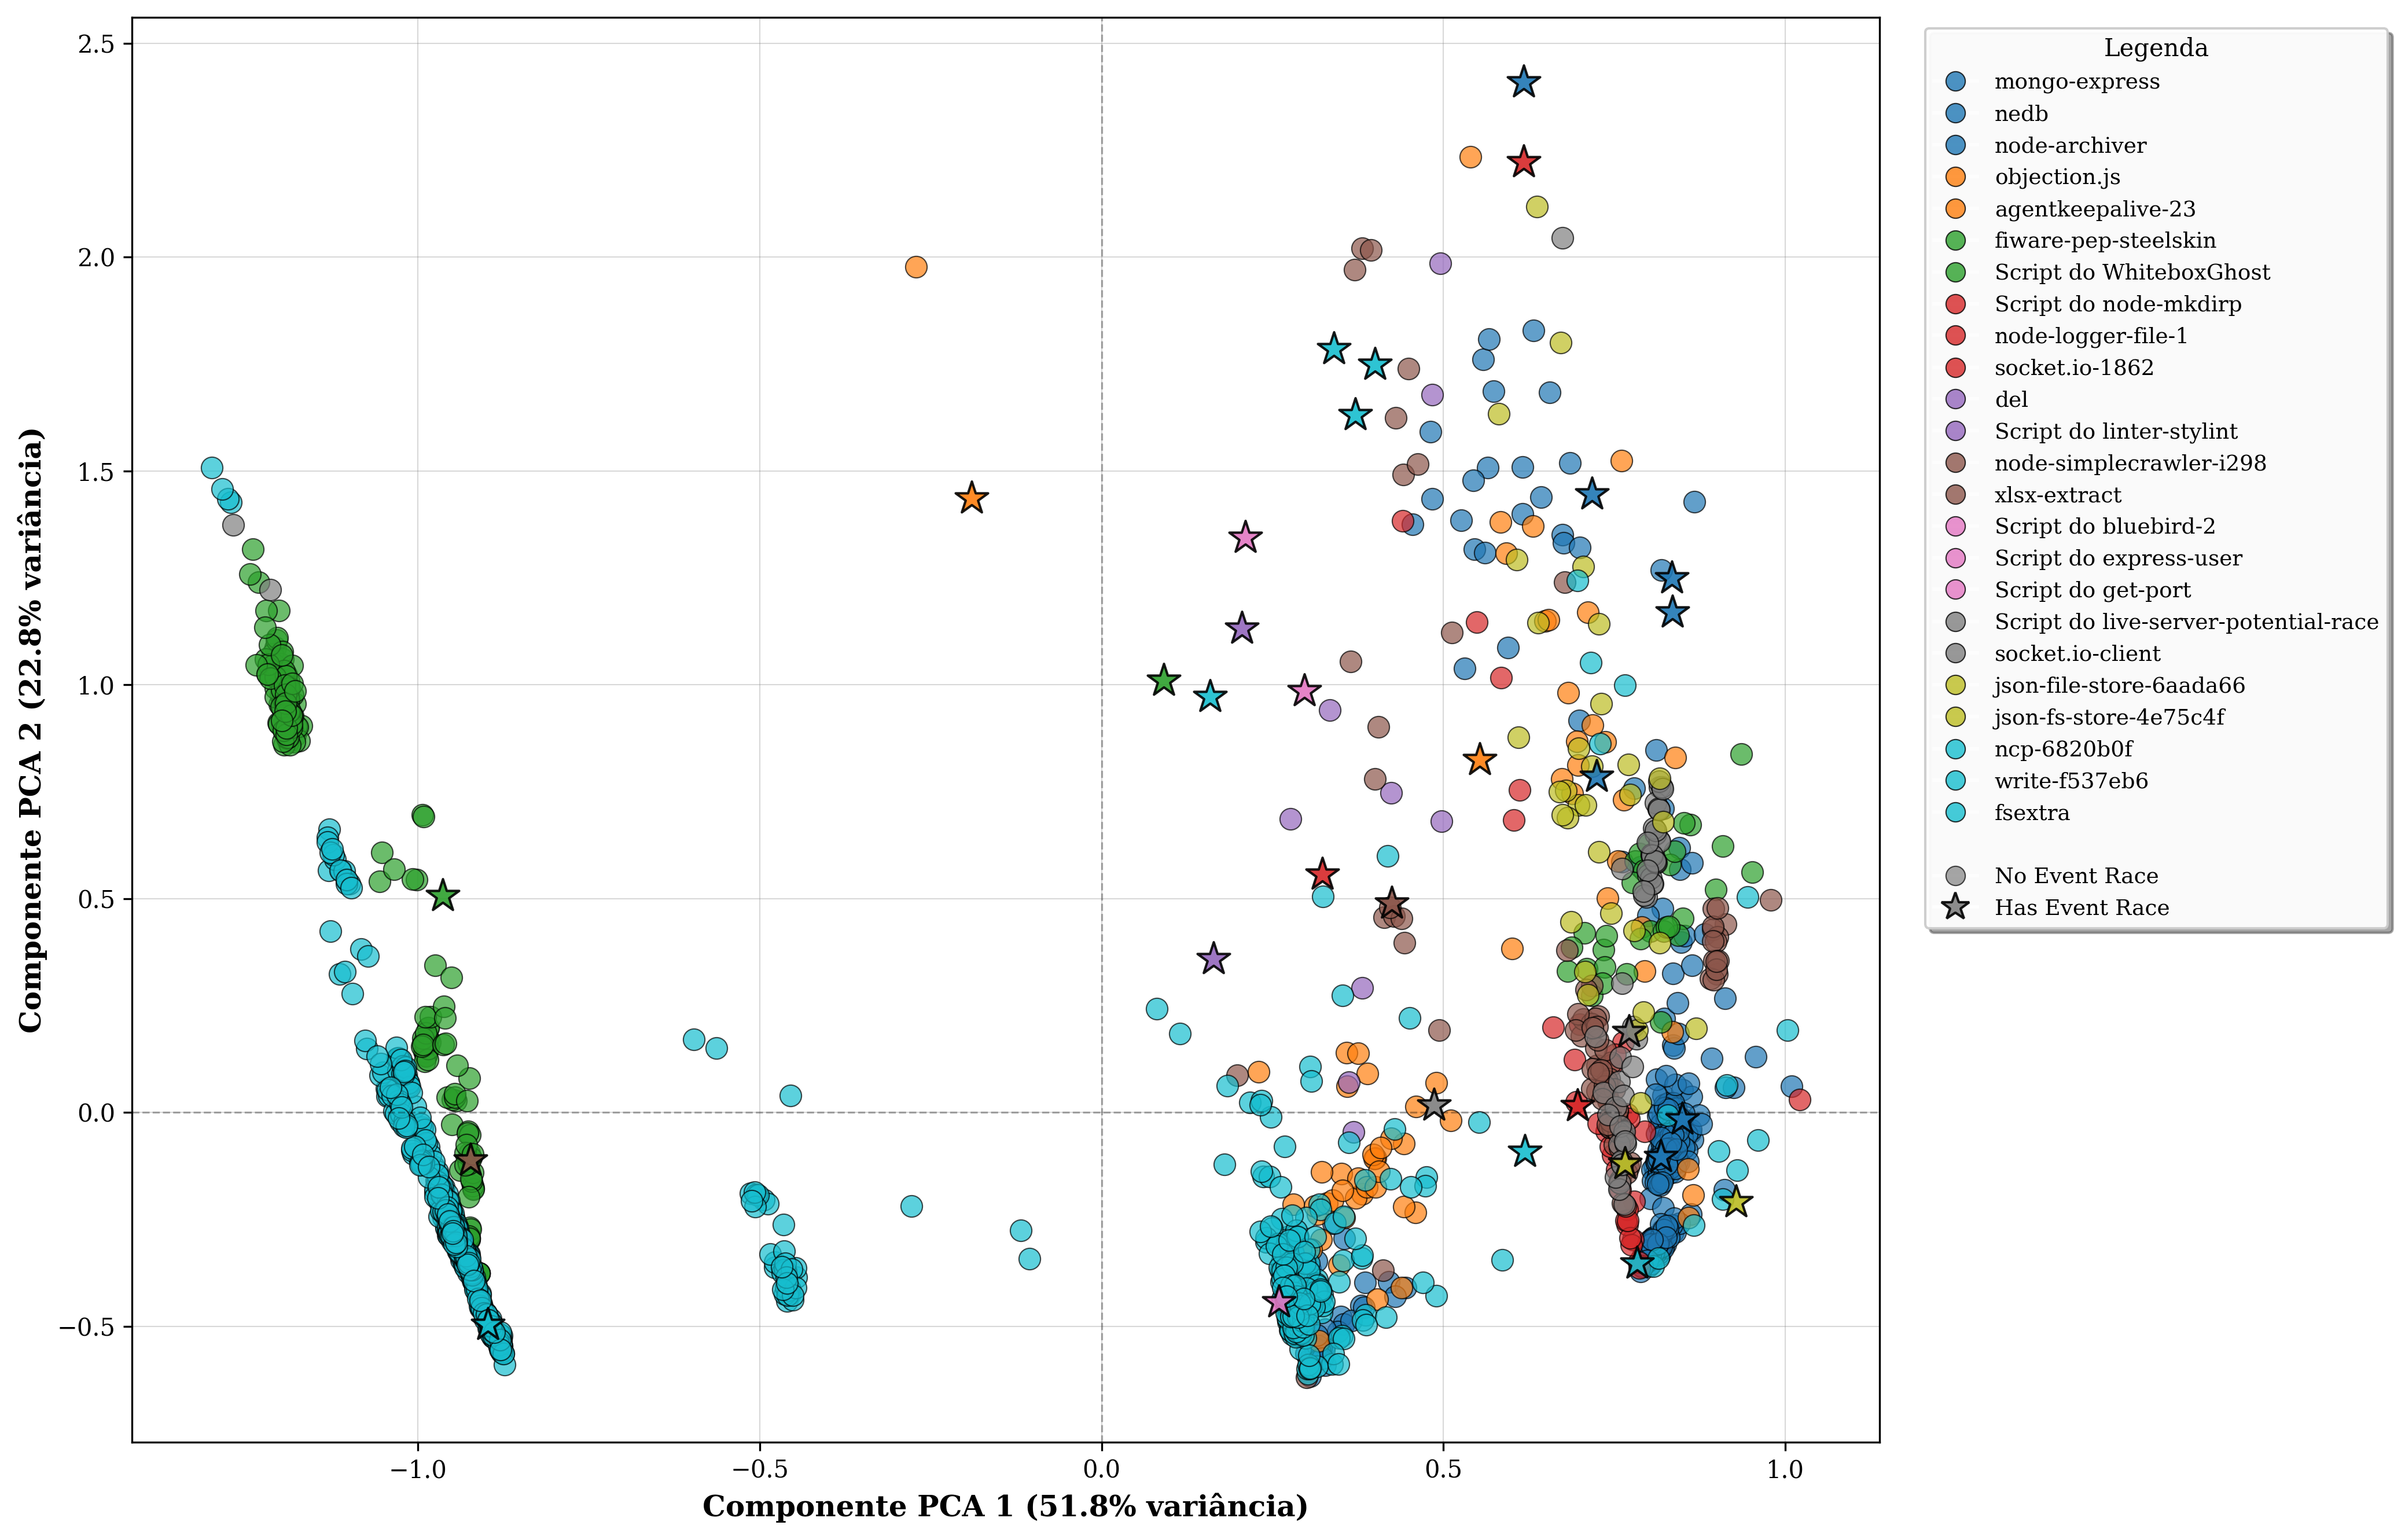

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

plt.style.use('default')
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['grid.alpha'] = 0.3

numeric_columns = df_pca.select_dtypes(include=[np.number]).columns
df_numeric = df_pca[numeric_columns]

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_numeric)

has_event_mask = df_pca['HasEventRace'] == True

benchmark_names = df_pca['BenchmarkName'].unique()
num_benchmarks = len(benchmark_names)

cores_profissionais = [
    '#4682B4',  # Azul aço
    '#FFA07A',  # Salmão claro
    '#32CD32',  # Verde lima
    '#708090',  # Cinza ardósia
    '#9370DB',  # Púrpura médio
    '#20B2AA',  # Turquesa claro
    '#FF6347',  # Tomate
    '#4169E1',  # Azul royal
    '#FFD700',  # Ouro
    '#8B4513',  # Marrom sela
]

if num_benchmarks <= len(cores_profissionais):
    benchmark_to_color = {name: cores_profissionais[i] for i, name in enumerate(benchmark_names)}
else:
    cmap = plt.cm.get_cmap('tab10', num_benchmarks)
    benchmark_to_color = {name: cmap(i) for i, name in enumerate(benchmark_names)}

fig, ax = plt.subplots(figsize=(14, 9), dpi=300)

for benchmark_name in benchmark_names:
    mask = (df_pca['BenchmarkName'] == benchmark_name) & (~has_event_mask)
    if mask.any():
        ax.scatter(pca_data[mask, 0], pca_data[mask, 1],
                  c=[benchmark_to_color[benchmark_name]],
                  s=80,
                  marker='o',
                  alpha=0.7,
                  edgecolor='black',
                  linewidth=0.5)

for benchmark_name in benchmark_names:
    mask = (df_pca['BenchmarkName'] == benchmark_name) & (has_event_mask)
    if mask.any():
        ax.scatter(pca_data[mask, 0], pca_data[mask, 1],
                  c=[benchmark_to_color[benchmark_name]],
                  s=200,
                  marker='*',
                  alpha=0.9,
                  edgecolor='black',
                  linewidth=1.0)

ax.set_xlabel(f'Componente PCA 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variância)',
             fontsize=12, fontweight='bold')
ax.set_ylabel(f'Componente PCA 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variância)',
             fontsize=12, fontweight='bold')

ax.tick_params(axis='both', which='major', labelsize=10)

ax.grid(True, linestyle='-', alpha=0.3, color='gray', linewidth=0.5)
ax.set_axisbelow(True)

ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.3)
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8, alpha=0.3)

for spine in ax.spines.values():
    spine.set_linewidth(0.8)
    spine.set_color('black')

legend_elements = []

for benchmark_name in benchmark_names:
    legend_elements.append(
        Line2D([0], [0], marker='o', color='w',
               markerfacecolor=benchmark_to_color[benchmark_name],
               markeredgecolor='black', markeredgewidth=0.5,
               markersize=8, label=benchmark_name, alpha=0.8)
    )

legend_elements.append(Line2D([0], [0], color='none', label=''))

legend_elements.append(
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor='gray', markeredgecolor='black',
           markeredgewidth=0.5, markersize=8,
           label='No Event Race', alpha=0.7)
)
legend_elements.append(
    Line2D([0], [0], marker='*', color='w',
           markerfacecolor='gray', markeredgecolor='black',
           markeredgewidth=1.0, markersize=12,
           label='Has Event Race', alpha=0.9)
)

legend = ax.legend(handles=legend_elements,
                  bbox_to_anchor=(1.02, 1),
                  loc='upper left',
                  frameon=True,
                  fancybox=True,
                  shadow=True,
                  fontsize=9,
                  framealpha=0.95,
                  title='Legenda',
                  title_fontsize=10)

plt.tight_layout()

print("Análise PCA:")
print(f"\nVariância explicada por componente:")
print(f"Componente 1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Componente 2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"Total acumulado: {sum(pca.explained_variance_ratio_)*100:.2f}%")

print(f"\nDistribuição de pontos:")
print(f"Total de pontos: {len(df_pca)}")
print(f"Pontos com Event Race: {has_event_mask.sum()} ({has_event_mask.sum()/len(df_pca)*100:.1f}%)")
print(f"Pontos sem Event Race: {(~has_event_mask).sum()} ({(~has_event_mask).sum()/len(df_pca)*100:.1f}%)")

print(f"\nDistribuição por Benchmark:")
for benchmark_name in benchmark_names:
    total = (df_pca['BenchmarkName'] == benchmark_name).sum()
    with_race = ((df_pca['BenchmarkName'] == benchmark_name) & has_event_mask).sum()
    print(f"{benchmark_name}: {total} pontos ({with_race} com Event Race)")

# plt.savefig('pca_benchmark_analysis.png', dpi=300, bbox_inches='tight',
#            facecolor='white', edgecolor='none')
# plt.savefig('pca_benchmark_analysis.pdf', bbox_inches='tight',
#            facecolor='white', edgecolor='none')

plt.show()

<a id="rq1"></a>
# **Aplicação dos Modelos de ML - QP1**

In [ ]:
x_scaled = x_scaled.drop(columns=['Random_Col_1', 'Random_Col_2', 'Random_Col_3'])
x_scaled

InvokeFunPre_Count_Raw  InvokeFunPre_Count_Normalized  \
0                  0.002103                       0.060137   
1                  0.053720                       1.000000   
2                  0.000409                       0.496350   
3                  0.001484                       0.008215   
4                  0.007266                       0.117983   
..                      ...                            ...   
123                0.001178                       0.004540   
124                0.000349                       0.620690   
125                0.005355                       0.081698   
126                0.003642                       0.280069   
127                0.004844                       0.071999   

     Invokes_with_callback_Raw  Invokes_with_callback_Normalized  \
0                     0.004670                          0.247706   
1                     0.182840                          1.000000   
2                     0.001297                          0.500000   
3                     0.002162                          0.010422   
4                     0.014098                          0.075793   
..                         ...                               ...   
123                   0.000086                          0.000387   
124                   0.000865                          0.833333   
125                   0.007438                          0.039318   
126                   0.006400                          0.339450   
127                   0.007265                          0.038370   

     Cbs_Total_delay_ms_Raw  Cbs_Total_delay_ms_Normalized  \
0                  0.009891                       0.070941   
1                  0.016816                       0.938681   
2                  0.003197                       0.222433   
3                  0.001770                       0.098749   
4                  0.004927                       0.274958   
..                      ...                            ...   
123                0.000001                       0.000001   
124                0.000640                       0.654087   
125                0.005249                       0.292954   
126                0.035140                       0.252035   
127                0.003808                       0.212482   

     Cb_Delays_Greater_Than_100_ms_Raw  \
0                             0.025871   
1                             0.037811   
2                             0.010945   
3                             0.005970   
4                             0.010945   
..                                 ...   
123                           0.000000   
124                           0.003980   
125                           0.007960   
126                           0.046766   
127                           0.008955   

     Cb_Delays_Greater_Than_100_ms_Normalized  \
0                                    0.148571   
1                                    0.775510   
2                                    0.733333   
3                                    0.122449   
4                                    0.224490   
..                                        ...   
123                                  0.000000   
124                                  0.666667   
125                                  0.163265   
126                                  0.268571   
127                                  0.183673   

     InvokesInterval_Greater_Than_100_ms_Raw  \
0                                   0.126437   
1                                   0.045977   
2                                   0.103448   
3                                   0.045977   
4                                   0.103448   
..                                       ...   
123                                 0.045977   
124                                 0.022989   
125                                 0.068966   
126                                 0.114943   
127                                 0.068966   

     InvokesInterval_Greate

## **Supervisionados**

### **KNN**

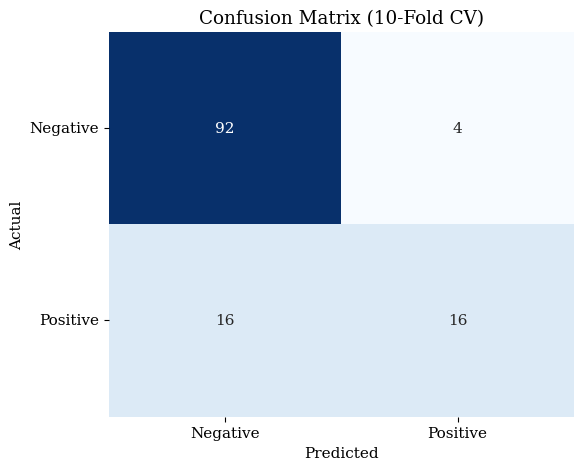

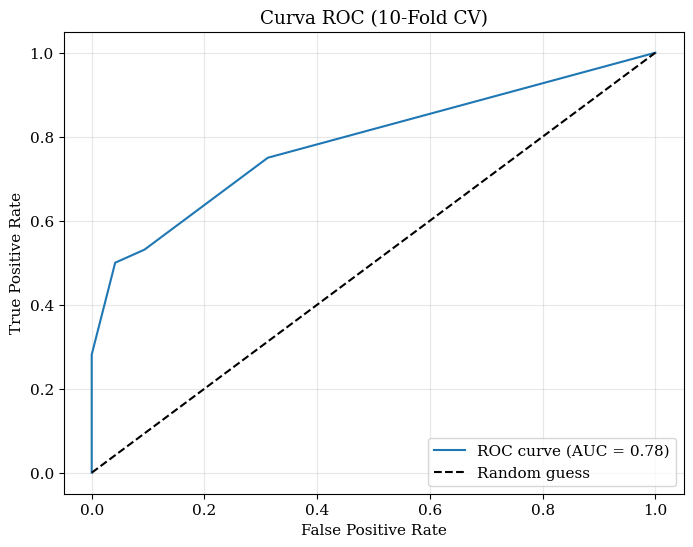

Relatório de Classificação (10-Fold CV):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        96
           1       0.80      0.50      0.62        32

    accuracy                           0.84       128
   macro avg       0.83      0.73      0.76       128
weighted avg       0.84      0.84      0.83       128



In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

y_true_all = []
y_pred_all = []
y_proba_all = []

for train_index, test_index in cv.split(x_scaled, y):
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)[:, 1]

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    y_proba_all.extend(y_proba)

conf_matrix = confusion_matrix(y_true_all, y_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (10-Fold CV)")
plt.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.show()

roc_auc = roc_auc_score(y_true_all, y_proba_all)

fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (10-Fold CV)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("Relatório de Classificação (10-Fold CV):")
print(classification_report(y_true_all, y_pred_all))

### **Decision Tree**

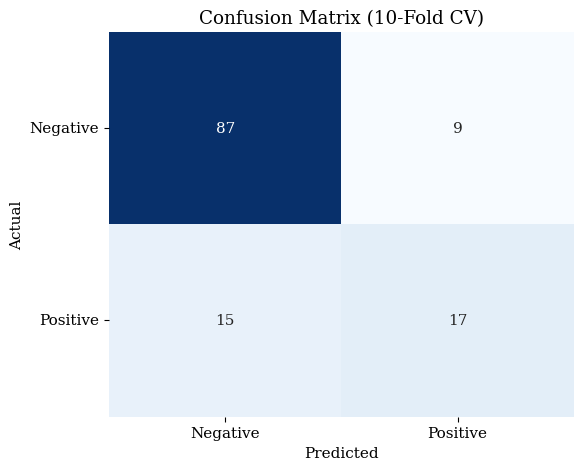

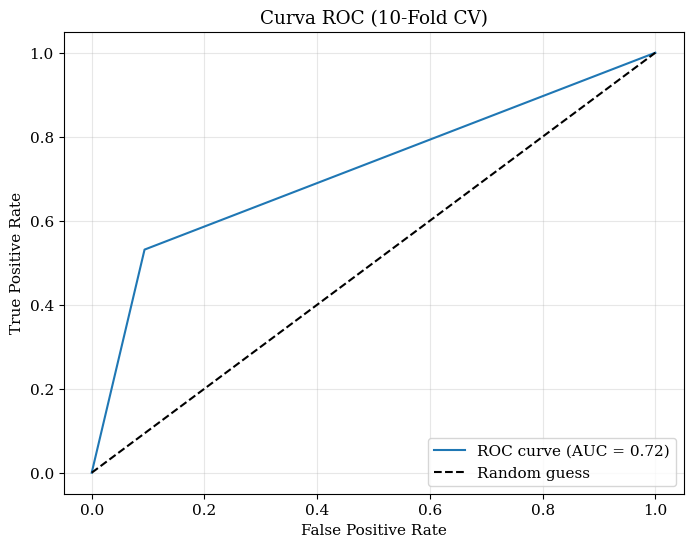

Relatório de Classificação (10-Fold CV):
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        96
           1       0.65      0.53      0.59        32

    accuracy                           0.81       128
   macro avg       0.75      0.72      0.73       128
weighted avg       0.80      0.81      0.81       128



In [ ]:
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

y_true_all = []
y_pred_all = []
y_proba_all = []

for train_index, test_index in cv.split(x_scaled, y):
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)
    y_proba = tree.predict_proba(X_test)[:, 1]

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    y_proba_all.extend(y_proba)

conf_matrix = confusion_matrix(y_true_all, y_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (10-Fold CV)")
plt.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.show()

roc_auc = roc_auc_score(y_true_all, y_proba_all)

fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (10-Fold CV)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("Relatório de Classificação (10-Fold CV):")
print(classification_report(y_true_all, y_pred_all))

### **Random Forest**

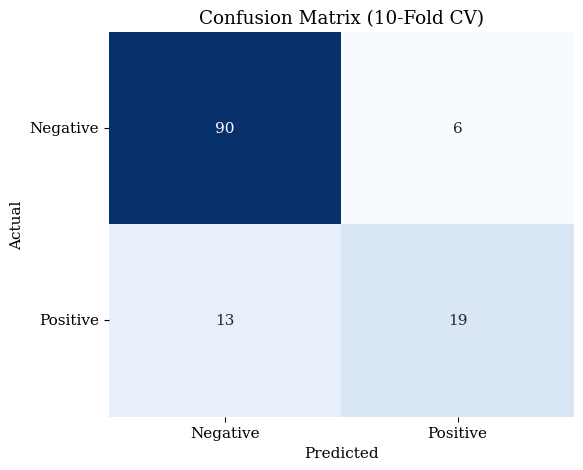

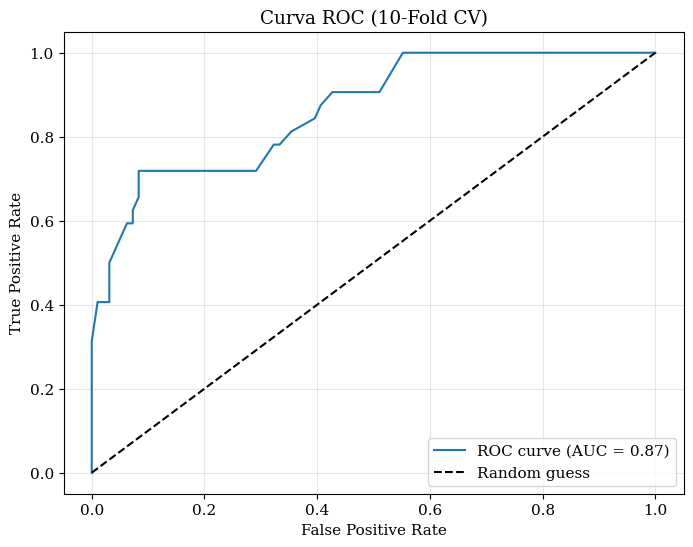

Relatório de Classificação (10-Fold CV):
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        96
           1       0.76      0.59      0.67        32

    accuracy                           0.85       128
   macro avg       0.82      0.77      0.79       128
weighted avg       0.85      0.85      0.85       128



In [ ]:
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced', n_jobs=-1,random_state=RANDOM_STATE)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

y_true_all = []
y_pred_all = []
y_proba_all = []

for train_index, test_index in cv.split(x_scaled, y):
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    y_proba = rf.predict_proba(X_test)[:, 1]

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    y_proba_all.extend(y_proba)

conf_matrix = confusion_matrix(y_true_all, y_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (10-Fold CV)")
plt.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.show()

roc_auc = roc_auc_score(y_true_all, y_proba_all)

fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (10-Fold CV)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("Relatório de Classificação (10-Fold CV):")
print(classification_report(y_true_all, y_pred_all))

### **Naive Bayes**

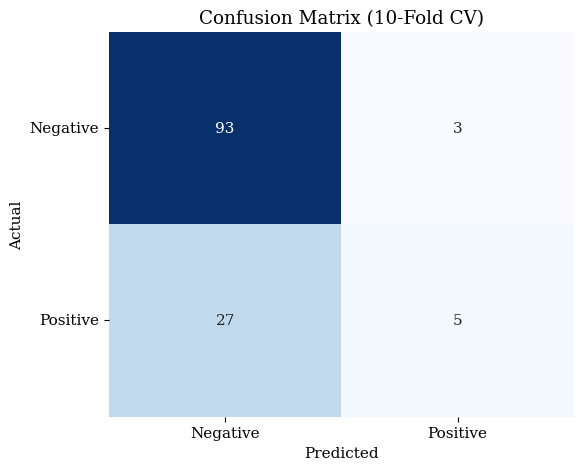

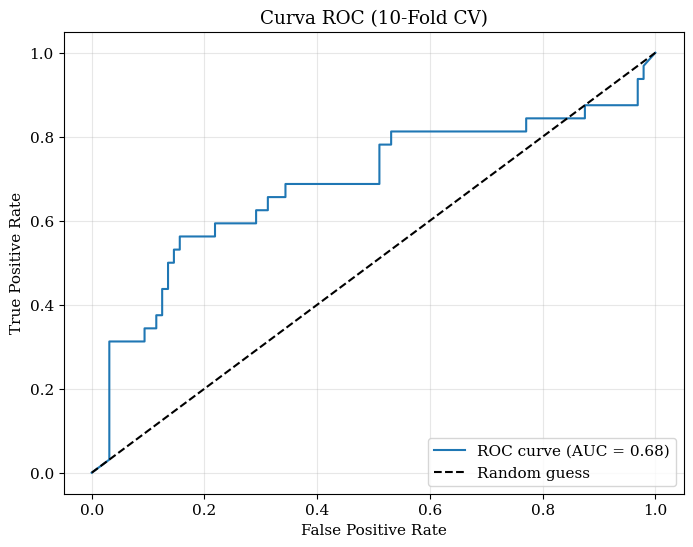

Relatório de Classificação (10-Fold CV):
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        96
           1       0.62      0.16      0.25        32

    accuracy                           0.77       128
   macro avg       0.70      0.56      0.56       128
weighted avg       0.74      0.77      0.71       128



In [ ]:
nb = GaussianNB()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

y_true_all = []
y_pred_all = []
y_proba_all = []

for train_index, test_index in cv.split(x_scaled, y):
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)
    y_proba = nb.predict_proba(X_test)[:, 1]

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    y_proba_all.extend(y_proba)

conf_matrix = confusion_matrix(y_true_all, y_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (10-Fold CV)")
plt.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.show()

roc_auc = roc_auc_score(y_true_all, y_proba_all)

fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (10-Fold CV)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("Relatório de Classificação (10-Fold CV):")
print(classification_report(y_true_all, y_pred_all))

### **SVM**

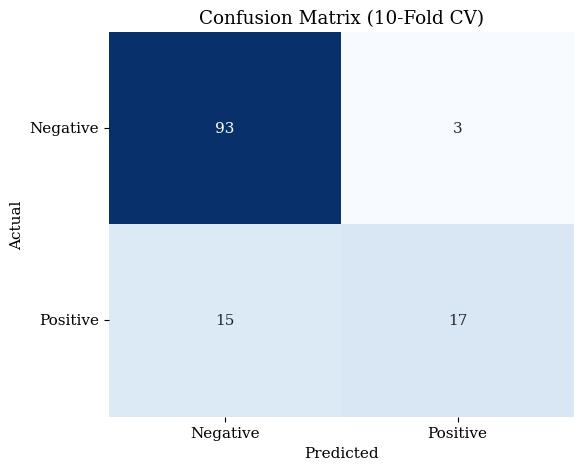

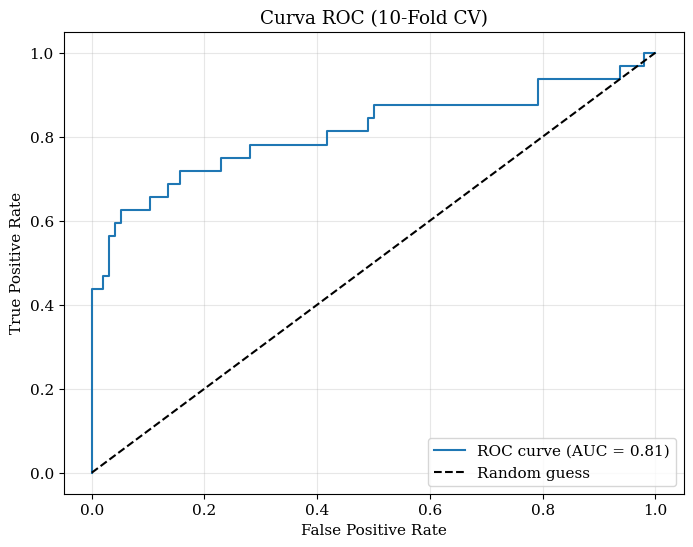

Relatório de Classificação (10-Fold CV):
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        96
           1       0.85      0.53      0.65        32

    accuracy                           0.86       128
   macro avg       0.86      0.75      0.78       128
weighted avg       0.86      0.86      0.85       128



In [ ]:
svm = SVC(
    probability=True,
    kernel='rbf',
    C=1.0,
    random_state=RANDOM_STATE)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

y_true_all = []
y_pred_all = []
y_proba_all = []

for train_index, test_index in cv.split(x_scaled, y):
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    y_proba = svm.predict_proba(X_test)[:, 1]

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    y_proba_all.extend(y_proba)

conf_matrix = confusion_matrix(y_true_all, y_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (10-Fold CV)")
plt.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.show()

roc_auc = roc_auc_score(y_true_all, y_proba_all)

fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (10-Fold CV)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("Relatório de Classificação (10-Fold CV):")
print(classification_report(y_true_all, y_pred_all))

### **Ensemble**

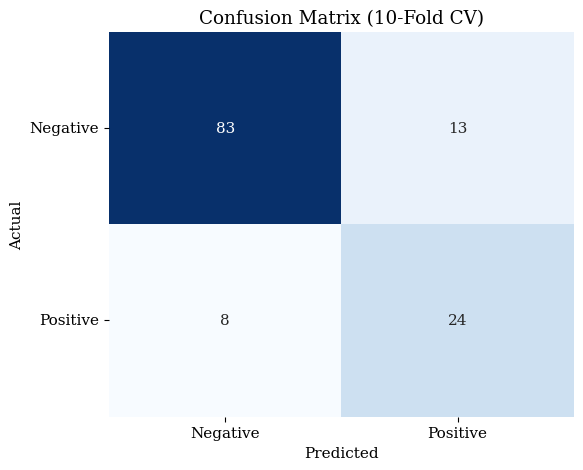

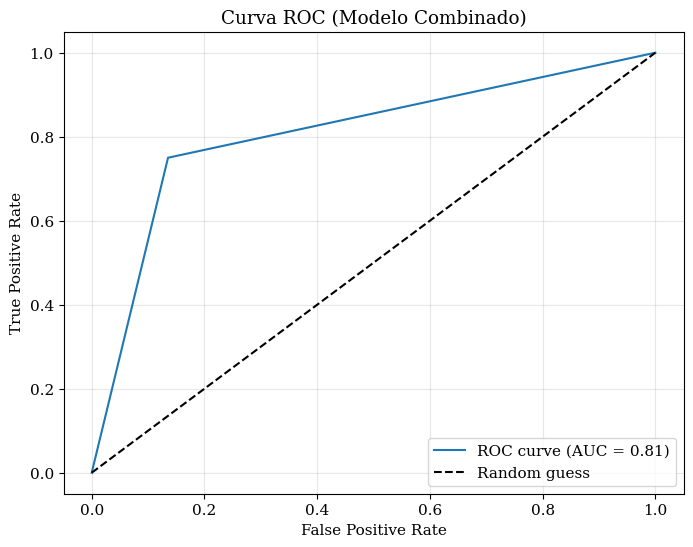

Relatório de Classificação (10-Fold CV):
              precision    recall  f1-score   support

    Negative       0.91      0.86      0.89        96
    Positive       0.65      0.75      0.70        32

    accuracy                           0.84       128
   macro avg       0.78      0.81      0.79       128
weighted avg       0.85      0.84      0.84       128



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
import numpy as np
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
rf = RandomForestClassifier(random_state=RANDOM_STATE)
svm = SVC(probability=True, random_state=RANDOM_STATE)
nb = GaussianNB()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

y_true_all = []
y_combined_all = []

for train_index, test_index in cv.split(x_scaled, y):
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    nb.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)
    y_pred_dt = dt.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_svm = svm.predict(X_test)
    y_pred_nb = nb.predict(X_test)

    y_combined = np.any(
        [y_pred_knn, y_pred_dt, y_pred_rf, y_pred_svm, y_pred_nb], axis=0
    ).astype(int)

    y_true_all.extend(y_test)
    y_combined_all.extend(y_combined)



conf_matrix = confusion_matrix(y_true_all, y_combined_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (10-Fold CV)")
plt.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"], rotation=0)
plt.show()

roc_auc = roc_auc_score(y_true_all, y_combined_all)

fpr, tpr, thresholds = roc_curve(y_true_all, y_combined_all)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (Modelo Combinado)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

class_report = classification_report(y_true_all, y_combined_all, target_names=["Negative", "Positive"])
print("Relatório de Classificação (10-Fold CV):")
print(class_report)

## **Não Supervisionados (Agrupamento)**

### **HDBSCAN** - Propaga o True para todos os clusters que possuem 3 True já conhecidos

Feature shape: (128, 30)
Label shape: (128,)
Label distribution (0: False, 1: True): [96 32]

Starting 10-Fold Cross-Validation with Label Propagation...

FOLD 1/10
Train size: 115, Test size: 13
Train label distribution: [86 29]

Clustering Results:
  Clusters found: [0 1 2 3 4]
  Noise points: 40
  Clustered points: 75

LABEL PROPAGATION ANALYSIS

OUTLIER/NOISE:
  Size: 40
  True samples: 23, False samples: 17
  Decision: TRUE (>= 3 True samples (23))

CLUSTER 0:
  Size: 29
  True samples: 2, False samples: 27
  Decision: FALSE (< 3 True samples (2))

CLUSTER 1:
  Size: 7
  True samples: 0, False samples: 7
  Decision: FALSE (< 3 True samples (0))

CLUSTER 2:
  Size: 18
  True samples: 2, False samples: 16
  Decision: FALSE (< 3 True samples (2))

CLUSTER 3:
  Size: 11
  True samples: 1, False samples: 10
  Decision: FALSE (< 3 True samples (1))

CLUSTER 4:
  Size: 10
  True samples: 1, False samples: 9
  Decision: FALSE (< 3 True samples (1))

Test Predictions:
  Predicted as True: 

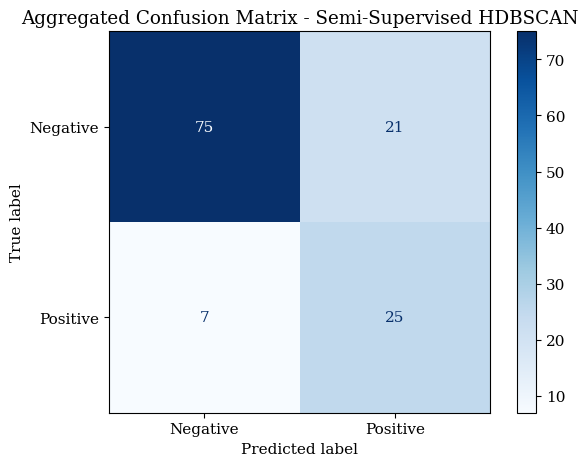


Label Propagation Complete!


In [ ]:
import numpy as np
import hdbscan
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message=".*'force_all_finite'.*", category=FutureWarning)

y_true = y.values if isinstance(y, pd.Series) else y
df_sampled_features = df_sampled.drop(
    columns=['BenchmarkName', 'TestFilePath', 'TestCaseName',
             'Random_Col_1', 'Random_Col_2', 'Random_Col_3', 'HasEventRace'],
    errors='ignore'
)

print(f"Feature shape: {df_sampled_features.shape}")
print(f"Label shape: {y_true.shape}")
print(f"Label distribution (0: False, 1: True): {np.bincount(y_true)}")

N_SPLITS = 10
HDBSCAN_MIN_CLUSTER_SIZE = 5
RANDOM_STATE = 42

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

all_y_true_test = []
all_y_pred_test = []
all_propagated_labels = []

print(f"\nStarting {N_SPLITS}-Fold Cross-Validation with Label Propagation...")

for fold, (train_index, test_index) in enumerate(skf.split(df_sampled_features, y_true)):
    print(f"\n{'='*60}")
    print(f"FOLD {fold + 1}/{N_SPLITS}")
    print(f"{'='*60}")

    X_train = df_sampled_features.iloc[train_index]
    X_test = df_sampled_features.iloc[test_index]
    y_train = y_true[train_index]
    y_test = y_true[test_index]

    print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
    print(f"Train label distribution: {np.bincount(y_train)}")

    cluster_labels_train = np.array([-1] * len(X_train))
    clusterer_train = None

    if X_train.shape[0] >= HDBSCAN_MIN_CLUSTER_SIZE and X_train.shape[1] > 0:
        try:
            clusterer_train = hdbscan.HDBSCAN(
                min_cluster_size=HDBSCAN_MIN_CLUSTER_SIZE,
                gen_min_span_tree=True,
                prediction_data=True
            )
            clusterer_train.fit(X_train)
            cluster_labels_train = clusterer_train.labels_

            unique_clusters = np.unique(cluster_labels_train)
            n_noise = np.sum(cluster_labels_train == -1)
            n_clustered = len(cluster_labels_train) - n_noise

            print(f"\nClustering Results:")
            print(f"  Clusters found: {unique_clusters[unique_clusters != -1]}")
            print(f"  Noise points: {n_noise}")
            print(f"  Clustered points: {n_clustered}")

        except Exception as e:
            print(f"ERROR: HDBSCAN failed: {e}")
    else:
        print(f"WARNING: Insufficient data for clustering (need >= {HDBSCAN_MIN_CLUSTER_SIZE})")

    print(f"\n{'='*60}")
    print("LABEL PROPAGATION ANALYSIS")
    print(f"{'='*60}")

    propagated_labels_train = y_train.copy()
    cluster_decisions = {}

    for cluster_id in np.unique(cluster_labels_train):
        cluster_mask = cluster_labels_train == cluster_id
        cluster_indices = np.where(cluster_mask)[0]

        cluster_true_labels = y_train[cluster_indices]
        n_true = np.sum(cluster_true_labels == 1)
        n_false = np.sum(cluster_true_labels == 0)
        cluster_size = len(cluster_indices)

        if n_true >= 3:
            cluster_decision = 1
            decision_reason = f">= 3 True samples ({n_true})"
        else:
            cluster_decision = 0
            decision_reason = f"< 3 True samples ({n_true})"

        propagated_labels_train[cluster_indices] = cluster_decision

        cluster_decisions[cluster_id] = {
            'size': cluster_size,
            'n_true': n_true,
            'n_false': n_false,
            'decision': cluster_decision,
            'reason': decision_reason
        }

        cluster_type = "OUTLIER/NOISE" if cluster_id == -1 else f"CLUSTER {cluster_id}"
        print(f"\n{cluster_type}:")
        print(f"  Size: {cluster_size}")
        print(f"  True samples: {n_true}, False samples: {n_false}")
        print(f"  Decision: {'TRUE' if cluster_decision == 1 else 'FALSE'} ({decision_reason})")

    y_pred_fold = np.zeros(len(test_index), dtype=int)

    if clusterer_train is not None and X_test.shape[0] > 0:
        try:
            cluster_labels_test, strengths = hdbscan.prediction.approximate_predict(
                clusterer_train, X_test
            )

            for i, test_cluster_id in enumerate(cluster_labels_test):
                if test_cluster_id in cluster_decisions:
                    y_pred_fold[i] = cluster_decisions[test_cluster_id]['decision']
                else:
                    y_pred_fold[i] = 0

            print(f"\nTest Predictions:")
            print(f"  Predicted as True: {np.sum(y_pred_fold == 1)}")
            print(f"  Predicted as False: {np.sum(y_pred_fold == 0)}")

        except Exception as e:
            print(f"ERROR: Test prediction failed: {e}")

    all_y_true_test.extend(y_test)
    all_y_pred_test.extend(y_pred_fold)
    all_propagated_labels.append(propagated_labels_train)

    fold_cm = confusion_matrix(y_test, y_pred_fold)
    print(f"\nFold {fold + 1} Confusion Matrix:")
    print(fold_cm)

print(f"\n{'='*60}")
print("FINAL AGGREGATED RESULTS")
print(f"{'='*60}")

all_y_true_test = np.array(all_y_true_test)
all_y_pred_test = np.array(all_y_pred_test)

final_conf_matrix = confusion_matrix(all_y_true_test, all_y_pred_test)
print("\nAggregated Confusion Matrix:")
print(final_conf_matrix)

if len(np.unique(all_y_true_test)) > 1 and len(np.unique(all_y_pred_test)) > 1:
    final_class_report = classification_report(
        all_y_true_test, all_y_pred_test,
        target_names=["Negative", "Positive"]
    )
    print("\nClassification Report:")
    print(final_class_report)
else:
    print("\nClassification Report (with zero_division handling):")
    print(classification_report(
        all_y_true_test, all_y_pred_test,
        zero_division=0,
        target_names=["Negative", "Positive"]
    ))

if len(np.unique(all_y_true_test)) > 0 and len(np.unique(all_y_pred_test)) > 0:
    display_labels = []
    if 0 in all_y_true_test or 0 in all_y_pred_test:
        display_labels.append("Negative")
    if 1 in all_y_true_test or 1 in all_y_pred_test:
        display_labels.append("Positive")

    if display_labels:
        disp = ConfusionMatrixDisplay(
            confusion_matrix=final_conf_matrix,
            display_labels=display_labels
        )
        disp.plot(cmap="Blues")
        plt.title("Aggregated Confusion Matrix - Semi-Supervised HDBSCAN")
        plt.tight_layout()
        plt.show()

print("\nLabel Propagation Complete!")

### **K-Means**

Feature shape: (128, 30)
Label shape: (128,)
Label distribution (0: False, 1: True): [96 32]

Starting 10-Fold Cross-Validation with Label Propagation (KMeans)...

FOLD 1/10
Train size: 115, Test size: 13
Train label distribution: [86 29]

Clustering Results (KMeans):
  Clusters found: 3
  Points per cluster: {np.int32(0): np.int64(18), np.int32(1): np.int64(39), np.int32(2): np.int64(58)}

LABEL PROPAGATION ANALYSIS

CLUSTER 0:
  Size: 18
  True samples: 15, False samples: 3
  Decision: TRUE (>= 3 True samples (15))

CLUSTER 1:
  Size: 39
  True samples: 3, False samples: 36
  Decision: TRUE (>= 3 True samples (3))

CLUSTER 2:
  Size: 58
  True samples: 11, False samples: 47
  Decision: TRUE (>= 3 True samples (11))

Test Predictions:
  Predicted as True: 13
  Predicted as False: 0

Fold 1 Confusion Matrix:
[[ 0 10]
 [ 0  3]]

FOLD 2/10
Train size: 115, Test size: 13
Train label distribution: [86 29]

Clustering Results (KMeans):
  Clusters found: 3
  Points per cluster: {np.int32(0):

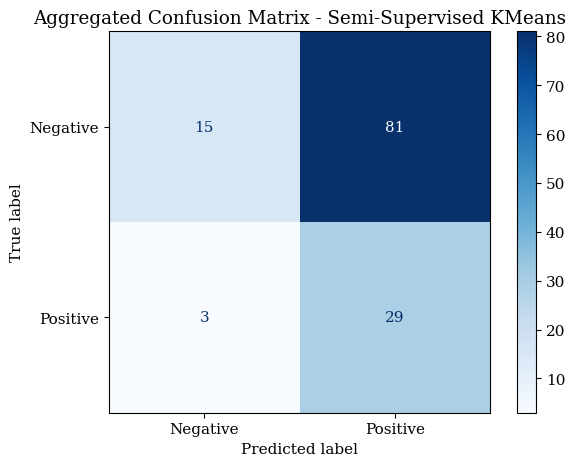


Label Propagation Complete!


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", message=".*'force_all_finite'.*", category=FutureWarning)

y_true = y.values if isinstance(y, pd.Series) else y
df_sampled_features = df_sampled.drop(
    columns=['BenchmarkName', 'TestFilePath', 'TestCaseName',
             'Random_Col_1', 'Random_Col_2', 'Random_Col_3', 'HasEventRace'],
    errors='ignore'
)

print(f"Feature shape: {df_sampled_features.shape}")
print(f"Label shape: {y_true.shape}")
print(f"Label distribution (0: False, 1: True): {np.bincount(y_true)}")

N_SPLITS = 10
KMEANS_N_CLUSTERS = 3
RANDOM_STATE = 42

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

all_y_true_test = []
all_y_pred_test = []
all_propagated_labels = []

print(f"\nStarting {N_SPLITS}-Fold Cross-Validation with Label Propagation (KMeans)...")

for fold, (train_index, test_index) in enumerate(skf.split(df_sampled_features, y_true)):
    print(f"\n{'='*60}")
    print(f"FOLD {fold + 1}/{N_SPLITS}")
    print(f"{'='*60}")

    X_train = df_sampled_features.iloc[train_index]
    X_test = df_sampled_features.iloc[test_index]
    y_train = y_true[train_index]
    y_test = y_true[test_index]

    print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
    print(f"Train label distribution: {np.bincount(y_train)}")

    clusterer_train = None
    cluster_labels_train = np.array([-1] * len(X_train))

    if X_train.shape[0] >= KMEANS_N_CLUSTERS and X_train.shape[1] > 0:
        try:
            clusterer_train = KMeans(
                n_clusters=KMEANS_N_CLUSTERS,
                random_state=RANDOM_STATE,
                n_init=10
            )
            clusterer_train.fit(X_train)
            cluster_labels_train = clusterer_train.labels_

            unique_clusters, counts = np.unique(cluster_labels_train, return_counts=True)

            print(f"\nClustering Results (KMeans):")
            print(f"  Clusters found: {len(unique_clusters)}")
            print(f"  Points per cluster: {dict(zip(unique_clusters, counts))}")

        except Exception as e:
            print(f"ERROR: KMeans failed: {e}")
    else:
        print(f"WARNING: Insufficient data for clustering (need >= {KMEANS_N_CLUSTERS} samples)")

    print(f"\n{'='*60}")
    print("LABEL PROPAGATION ANALYSIS")
    print(f"{'='*60}")

    propagated_labels_train = y_train.copy()
    cluster_decisions = {}

    for cluster_id in np.unique(cluster_labels_train):
        cluster_mask = cluster_labels_train == cluster_id
        cluster_indices = np.where(cluster_mask)[0]

        if len(cluster_indices) == 0:
            continue

        cluster_true_labels = y_train[cluster_indices]
        n_true = np.sum(cluster_true_labels == 1)
        n_false = np.sum(cluster_true_labels == 0)
        cluster_size = len(cluster_indices)

        if n_true >= 3:
            cluster_decision = 1
            decision_reason = f">= 3 True samples ({n_true})"
        else:
            cluster_decision = 0
            decision_reason = f"< 3 True samples ({n_true})"

        propagated_labels_train[cluster_indices] = cluster_decision

        cluster_decisions[cluster_id] = {
            'size': cluster_size,
            'n_true': n_true,
            'n_false': n_false,
            'decision': cluster_decision,
            'reason': decision_reason
        }

        print(f"\nCLUSTER {cluster_id}:")
        print(f"  Size: {cluster_size}")
        print(f"  True samples: {n_true}, False samples: {n_false}")
        print(f"  Decision: {'TRUE' if cluster_decision == 1 else 'FALSE'} ({decision_reason})")

    y_pred_fold = np.zeros(len(test_index), dtype=int)

    if clusterer_train is not None and X_test.shape[0] > 0:
        try:
            cluster_labels_test = clusterer_train.predict(X_test)

            for i, test_cluster_id in enumerate(cluster_labels_test):
                if test_cluster_id in cluster_decisions:
                    y_pred_fold[i] = cluster_decisions[test_cluster_id]['decision']
                else:
                    y_pred_fold[i] = 0

            print(f"\nTest Predictions:")
            print(f"  Predicted as True: {np.sum(y_pred_fold == 1)}")
            print(f"  Predicted as False: {np.sum(y_pred_fold == 0)}")

        except Exception as e:
            print(f"ERROR: Test prediction failed: {e}")

    all_y_true_test.extend(y_test)
    all_y_pred_test.extend(y_pred_fold)
    all_propagated_labels.append(propagated_labels_train)

    fold_cm = confusion_matrix(y_test, y_pred_fold)
    print(f"\nFold {fold + 1} Confusion Matrix:")
    print(fold_cm)

print(f"\n{'='*60}")
print("FINAL AGGREGATED RESULTS")
print(f"{'='*60}")

all_y_true_test = np.array(all_y_true_test)
all_y_pred_test = np.array(all_y_pred_test)

final_conf_matrix = confusion_matrix(all_y_true_test, all_y_pred_test)
print("\nAggregated Confusion Matrix:")
print(final_conf_matrix)

if len(np.unique(all_y_true_test)) > 1 and len(np.unique(all_y_pred_test)) > 1:
    final_class_report = classification_report(
        all_y_true_test, all_y_pred_test,
        target_names=["Negative", "Positive"]
    )
    print("\nClassification Report:")
    print(final_class_report)
else:
    print("\nClassification Report (with zero_division handling):")
    print(classification_report(
        all_y_true_test, all_y_pred_test,
        zero_division=0,
        target_names=["Negative", "Positive"]
    ))

if len(np.unique(all_y_true_test)) > 0 and len(np.unique(all_y_pred_test)) > 0:
    display_labels = []
    if 0 in all_y_true_test or 0 in all_y_pred_test:
        display_labels.append("Negative")
    if 1 in all_y_true_test or 1 in all_y_pred_test:
        display_labels.append("Positive")

    if display_labels:
        disp = ConfusionMatrixDisplay(
            confusion_matrix=final_conf_matrix,
            display_labels=display_labels
        )
        disp.plot(cmap="Blues")
        plt.title("Aggregated Confusion Matrix - Semi-Supervised KMeans")
        plt.tight_layout()
        plt.show()

print("\nLabel Propagation Complete!")

### **Isolation Forest**

Formato df_sampled_features: (128, 30)
Formato y_true: (128,)
Distribuição de y_true (0: False, 1: True): [96 32]

Iniciando 10-Fold Cross-Validation com Isolation Forest...

--- Fold 1/10 ---
  Tamanho Treino: 115, Teste: 13
  Limiar de anomalia (fold 1): -0.4709
--- Fold 2/10 ---
  Tamanho Treino: 115, Teste: 13
  Limiar de anomalia (fold 2): -0.4553
--- Fold 3/10 ---
  Tamanho Treino: 115, Teste: 13
  Limiar de anomalia (fold 3): -0.4658
--- Fold 4/10 ---
  Tamanho Treino: 115, Teste: 13
  Limiar de anomalia (fold 4): -0.4864
--- Fold 5/10 ---
  Tamanho Treino: 115, Teste: 13
  Limiar de anomalia (fold 5): -0.4460
--- Fold 6/10 ---
  Tamanho Treino: 115, Teste: 13
  Limiar de anomalia (fold 6): -0.4786
--- Fold 7/10 ---
  Tamanho Treino: 115, Teste: 13
  Limiar de anomalia (fold 7): -0.4880
--- Fold 8/10 ---
  Tamanho Treino: 115, Teste: 13
  Limiar de anomalia (fold 8): -0.4664
--- Fold 9/10 ---
  Tamanho Treino: 116, Teste: 12
  Limiar de anomalia (fold 9): -0.5208
--- Fold 10/10 

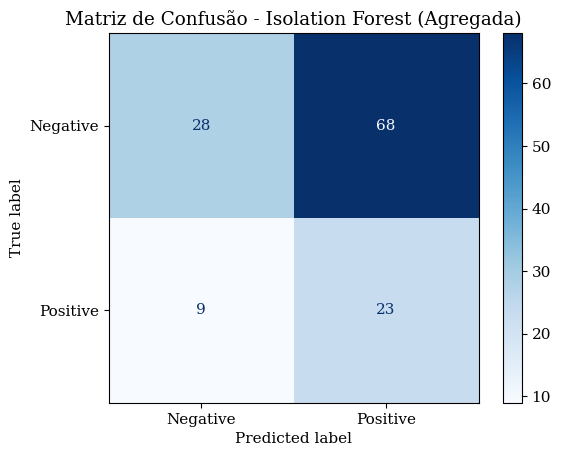

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message=".*'force_all_finite'.*", category=FutureWarning)


y_true = y_true.astype(int)

if not np.all(np.isin(y_true, [0, 1])):
    raise ValueError("y_true contém valores diferentes de 0 e 1.")

df_sampled_features = df_sampled.drop(
    columns=['BenchmarkName', 'TestFilePath', 'TestCaseName',
             'Random_Col_1', 'Random_Col_2', 'Random_Col_3', 'HasEventRace'],
    errors='ignore'
)

print(f"Formato df_sampled_features: {df_sampled_features.shape}")
print(f"Formato y_true: {y_true.shape}")
print(f"Distribuição de y_true (0: False, 1: True): {np.bincount(y_true)}")
if len(np.bincount(y_true)) < 2:
    print("Aviso: y_true contém apenas uma classe — a análise pode não funcionar corretamente.")


N_SPLITS = 10
RANDOM_STATE = 42
CONTAMINATION_RATE = 0.3

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

all_y_true_test = []
all_y_pred_test = []

print(f"\nIniciando {N_SPLITS}-Fold Cross-Validation com Isolation Forest...\n")


for fold, (train_index, test_index) in enumerate(skf.split(df_sampled_features, y_true)):
    print(f"--- Fold {fold + 1}/{N_SPLITS} ---")

    X_train, X_test = df_sampled_features.iloc[train_index], df_sampled_features.iloc[test_index]
    y_train, y_test = y_true[train_index], y_true[test_index]

    print(f"  Tamanho Treino: {X_train.shape[0]}, Teste: {X_test.shape[0]}")

    Pontuacao_train = {idx: 0 for idx in range(X_train.shape[0])}
    X_train_np = X_train.values

    for metric_idx in range(X_train_np.shape[1]):
        try:
            col_data = X_train_np[:, metric_idx]
            if np.all(np.isnan(col_data)):
                continue
            t_max_train_relative_index = np.nanargmax(col_data)
            Pontuacao_train[t_max_train_relative_index] += 1
        except Exception:
            continue

    iso_forest = None
    y_pred_fold = np.zeros(len(test_index), dtype=int)  # default = False (0)

    try:
        X_train_true = X_train[y_train == 1]
        if X_train_true.shape[0] > 0:
            iso_forest = IsolationForest(
                n_estimators=100,
                contamination=CONTAMINATION_RATE,
                random_state=RANDOM_STATE
            )
            iso_forest.fit(X_train_true)

            y_pred_iforest = iso_forest.predict(X_test)
            y_pred_fold = np.where(y_pred_iforest == 1, 1, 0)

            scores = iso_forest.score_samples(X_test)
            threshold = np.percentile(scores, CONTAMINATION_RATE * 100)
            print(f"  Limiar de anomalia (fold {fold+1}): {threshold:.4f}")

        else:
            print(f"  Aviso Fold {fold+1}: Sem exemplos 'True' suficientes para treinar Isolation Forest.")
    except Exception as e:
        print(f"  ERRO Fold {fold+1}: Falha ao treinar/predizer IsolationForest: {e}")

    all_y_true_test.extend(y_test)
    all_y_pred_test.extend(y_pred_fold)

print("\n--- Resultados Finais Agregados ---")
final_conf_matrix = confusion_matrix(all_y_true_test, all_y_pred_test)
print("\nMatriz de Confusão Final:")
print(final_conf_matrix)

final_class_report = classification_report(all_y_true_test, all_y_pred_test,
                                           target_names=["Negative", "Positive"])
print("\nRelatório de Classificação Final:")
print(final_class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=final_conf_matrix,
                              display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Isolation Forest (Agregada)")
plt.show()


### **PUL** (Positive and Unlabeled Learning)

In [ ]:
!pip install pulearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 102.7 MB/s eta 0:00:00
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is 

Formato df_sampled_features: (128, 30)
Formato y_true: (128,)
Distribuição de y_true (0: False/Unknown, 1: True): [96 32]

Iniciando 10-Fold CV com PU Learning (RF) e Threshold = 0.4...

--- Fold 1/10 ---
  Tamanho Treino: 115, Teste: 13
  Modelo PU treinado.
  Acurácia do fold (Thresh 0.4): 0.6923
--- Fold 2/10 ---
  Tamanho Treino: 115, Teste: 13
  Modelo PU treinado.
  Acurácia do fold (Thresh 0.4): 0.8462
--- Fold 3/10 ---
  Tamanho Treino: 115, Teste: 13
  Modelo PU treinado.
  Acurácia do fold (Thresh 0.4): 0.6154
--- Fold 4/10 ---
  Tamanho Treino: 115, Teste: 13
  Modelo PU treinado.
  Acurácia do fold (Thresh 0.4): 0.6923
--- Fold 5/10 ---
  Tamanho Treino: 115, Teste: 13
  Modelo PU treinado.
  Acurácia do fold (Thresh 0.4): 0.7692
--- Fold 6/10 ---
  Tamanho Treino: 115, Teste: 13
  Modelo PU treinado.
  Acurácia do fold (Thresh 0.4): 0.5385
--- Fold 7/10 ---
  Tamanho Treino: 115, Teste: 13
  Modelo PU treinado.
  Acurácia do fold (Thresh 0.4): 0.9231
--- Fold 8/10 ---
  Ta

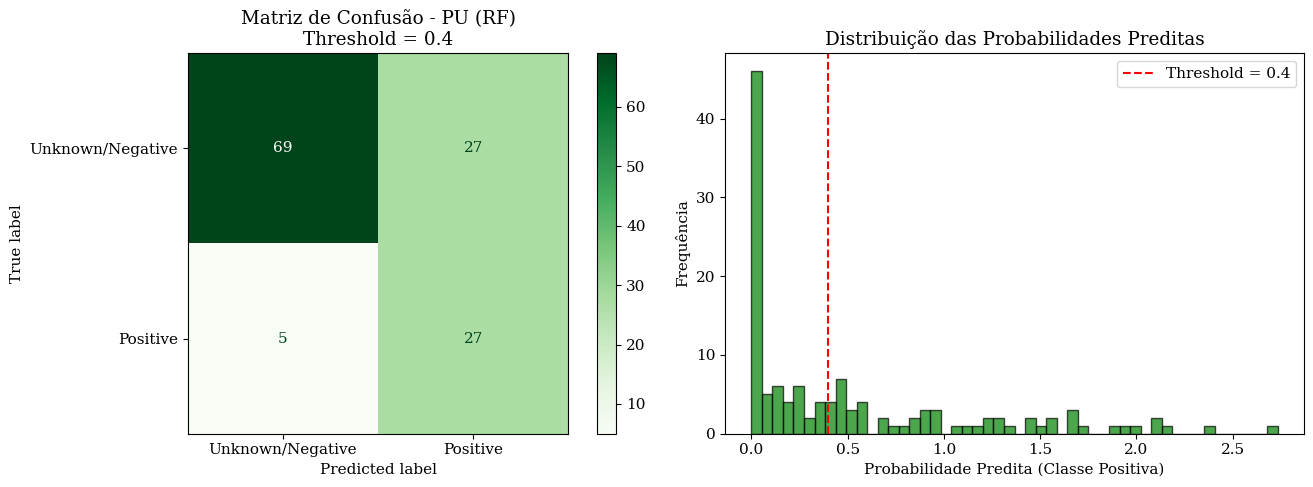

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pulearn import ElkanotoPuClassifier
import warnings
warnings.filterwarnings("ignore", message=".*'force_all_finite'.*", category=FutureWarning)


try:
    y_true = df_sampled['HasEventRace'].values.astype(int)
    if not np.all(np.isin(y_true, [0, 1])):
       raise ValueError("Coluna 'HasEventRace' contém valores diferentes de 0 e 1 em df_sampled.")
except KeyError:
    print("Erro: Coluna 'HasEventRace' não encontrada no DataFrame 'df_sampled'.")
    exit()
except NameError:
    print("Erro: DataFrame 'df_sampled' não está definido na memória.")
    exit()
except Exception as e:
    print(f"Erro ao preparar y_true de df_sampled: {e}")
    exit()

df_sampled_features = df_sampled.drop(columns=['BenchmarkName', 'TestFilePath', 'TestCaseName', 'Random_Col_1', 'Random_Col_2', 'Random_Col_3', 'HasEventRace'], errors='ignore')


print(f"Formato df_sampled_features: {df_sampled_features.shape}")
print(f"Formato y_true: {y_true.shape}")
print(f"Distribuição de y_true (0: False/Unknown, 1: True): {np.bincount(y_true)}")


N_SPLITS = 10
POS_LABEL = 1
UNLABELED_LABEL = 0
RANDOM_STATE = 42
THRESHOLD = 0.4

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

all_y_true_test = []
all_y_pred_test = []
all_y_proba_test = []

print(f"\nIniciando {N_SPLITS}-Fold CV com PU Learning (RF) e Threshold = {THRESHOLD}...\n")


for fold, (train_index, test_index) in enumerate(skf.split(df_sampled_features, y_true)):
    print(f"--- Fold {fold + 1}/{N_SPLITS} ---")

    X_train = df_sampled_features.iloc[train_index].values
    X_test = df_sampled_features.iloc[test_index].values
    y_train, y_test = y_true[train_index], y_true[test_index]

    print(f"  Tamanho Treino: {X_train.shape[0]}, Teste: {X_test.shape[0]}")

    if np.sum(y_train == POS_LABEL) == 0:
        print(f"  Aviso Fold {fold+1}: Nenhum exemplo positivo disponível. Pulando fold.")
        continue

    base_estimator = RandomForestClassifier(
        n_estimators=50,
        class_weight='balanced',
        n_jobs=-1,
        random_state=RANDOM_STATE
    )

    pu_estimator = ElkanotoPuClassifier(
        estimator=base_estimator,
        hold_out_ratio=0.2
    )

    np.random.seed(RANDOM_STATE)
    pu_estimator.fit(X_train, y_train)
    print(f"  Modelo PU treinado.")


    try:
        y_proba_fold = pu_estimator.predict_proba(X_test)[:, 1]
    except AttributeError:
        print("  Aviso: predict_proba não disponível, usando predict padrão (0.5).")
        y_pred_fold = pu_estimator.predict(X_test)
        y_proba_fold = np.zeros_like(y_pred_fold, dtype=float)

    y_pred_fold = (y_proba_fold >= THRESHOLD).astype(int)

    all_y_proba_test.extend(y_proba_fold)

    all_y_true_test.extend(y_test)
    all_y_pred_test.extend(y_pred_fold)

    fold_accuracy = np.mean(y_pred_fold == y_test)
    print(f"  Acurácia do fold (Thresh {THRESHOLD}): {fold_accuracy:.4f}")

print("\n" + "="*60)
print(f"--- Resultados Finais Agregados (Threshold: {THRESHOLD}) ---")
print("="*60)

final_conf_matrix = confusion_matrix(all_y_true_test, all_y_pred_test)
print("\nMatriz de Confusão Final:")
print(final_conf_matrix)

final_class_report = classification_report(
    all_y_true_test,
    all_y_pred_test,
    target_names=["Unknown/Negative", "Positive"],
    digits=4
)
print("\nRelatório de Classificação Final:")
print(final_class_report)

overall_accuracy = np.mean(np.array(all_y_pred_test) == np.array(all_y_true_test))
print(f"\nAcurácia Geral: {overall_accuracy:.4f}")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

disp = ConfusionMatrixDisplay(
    confusion_matrix=final_conf_matrix,
    display_labels=["Unknown/Negative", "Positive"]
)
disp.plot(cmap="Greens", ax=axes[0])
axes[0].set_title(f"Matriz de Confusão - PU (RF)\nThreshold = {THRESHOLD}")

if all_y_proba_test:
    axes[1].hist(all_y_proba_test, bins=50, alpha=0.7, color='green', edgecolor='black')

    axes[1].axvline(x=THRESHOLD, color='red', linestyle='--', label=f'Threshold = {THRESHOLD}')

    axes[1].set_xlabel('Probabilidade Predita (Classe Positiva)')
    axes[1].set_ylabel('Frequência')
    axes[1].set_title('Distribuição das Probabilidades Preditas')
    axes[1].legend()
else:
    axes[1].text(0.5, 0.5, 'Probabilidades não disponíveis',
                ha='center', va='center', transform=axes[1].transAxes)
    axes[1].axis('off')

plt.tight_layout()
plt.show()

### **Label Spreading**

Total de amostras: 128
Total Confirmado False (Regra): 2
Total True Original: 32

Iniciando 10-Fold Cross-Validation...

Fold 1: Treino com False=2, True=29, Unlabeled=84
Fold 2: Treino com False=2, True=29, Unlabeled=84
Fold 3: Treino com False=2, True=29, Unlabeled=84
Fold 4: Treino com False=1, True=29, Unlabeled=85
Fold 5: Treino com False=2, True=29, Unlabeled=84
Fold 6: Treino com False=1, True=29, Unlabeled=85
Fold 7: Treino com False=2, True=28, Unlabeled=85
Fold 8: Treino com False=2, True=28, Unlabeled=85
Fold 9: Treino com False=2, True=29, Unlabeled=85
Fold 10: Treino com False=2, True=29, Unlabeled=85

--- Resultados Finais Agregados ---
[[21 75]
 [ 9 23]]
                   precision    recall  f1-score   support

False/Unknown (0)       0.70      0.22      0.33        96
         True (1)       0.23      0.72      0.35        32

         accuracy                           0.34       128
        macro avg       0.47      0.47      0.34       128
     weighted avg       0

/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_label_propagation.py:230: RuntimeWarning: invalid value encountered in

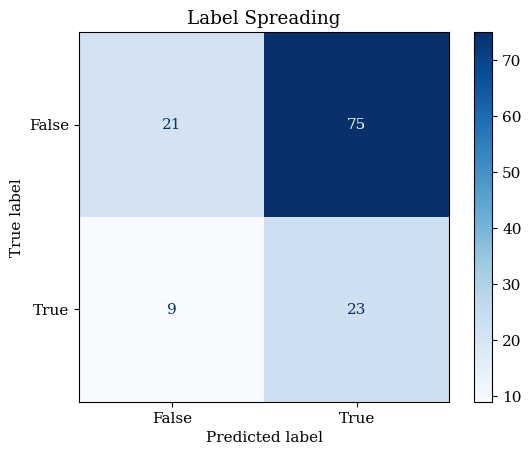

In [ ]:
import numpy as np
import pandas as pd
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

mask_confirmed_false = (
    (df_sampled_features['Invokes_with_callback_Raw'] == 0) &
    (df_sampled_features['AsyncFunction_Count_Raw'] == 0)
).values

y_true = y_true.astype(int)
y_true[mask_confirmed_false] = 0

df_train_features = df_sampled_features.drop(
    columns=['BenchmarkName', 'TestFilePath', 'TestCaseName',
             'Random_Col_1', 'Random_Col_2', 'Random_Col_3', 'HasEventRace'],
    errors='ignore'
)

X = df_train_features.values
y = y_true

print(f"Total de amostras: {len(y)}")
print(f"Total Confirmado False (Regra): {np.sum(mask_confirmed_false)}")
print(f"Total True Original: {np.sum(y == 1)}")



N_SPLITS = 10
RANDOM_STATE = 42

KERNEL = 'rbf'
GAMMA = 40
ALPHA = 0.2

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
scaler = StandardScaler()

all_y_true_test = []
all_y_pred_test = []

print(f"\nIniciando {N_SPLITS}-Fold Cross-Validation...\n")

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):

    X_train_raw, X_test_raw = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    mask_train_confirmed = mask_confirmed_false[train_index]

    X_train = scaler.fit_transform(X_train_raw)
    X_test = scaler.transform(X_test_raw)

    y_train_semi = np.copy(y_train)

    y_train_semi[y_train == 0] = -1

    y_train_semi[mask_train_confirmed] = 0

    n_false = np.sum(y_train_semi == 0)
    n_true = np.sum(y_train_semi == 1)
    n_unlabeled = np.sum(y_train_semi == -1)

    print(f"Fold {fold+1}: Treino com False={n_false}, True={n_true}, Unlabeled={n_unlabeled}")

    if n_false == 0:
        print("  AVISO: Nenhum 'False' confirmado neste fold. O modelo pode enviesar para True.")

    try:
        label_model = LabelSpreading(
            kernel=KERNEL,
            alpha=ALPHA,
            gamma=GAMMA,
            max_iter=1000,
            n_jobs=-1
        )

        label_model.fit(X_train, y_train_semi)
        y_pred_fold = label_model.predict(X_test)

        y_pred_fold = np.where(y_pred_fold == -1, 0, y_pred_fold)

    except Exception as e:
        print(f"  ERRO: {e}")
        y_pred_fold = np.zeros(len(test_index), dtype=int)

    all_y_true_test.extend(y_test)
    all_y_pred_test.extend(y_pred_fold)

print("\n--- Resultados Finais Agregados ---")
final_conf_matrix = confusion_matrix(all_y_true_test, all_y_pred_test)
print(final_conf_matrix)

print(classification_report(all_y_true_test, all_y_pred_test,
                            target_names=["False/Unknown (0)", "True (1)"],
                            zero_division=0))

disp = ConfusionMatrixDisplay(confusion_matrix=final_conf_matrix, display_labels=["False", "True"])
disp.plot(cmap="Blues")
plt.title(f"Label Spreading")
plt.show()

<a id="rq3"></a>
# **Aplicação Prática da Detecção - QP3**

In [ ]:
df_sampled = df_sampled.drop(columns=['Random_Col_1', 'Random_Col_2', 'Random_Col_3'], errors='ignore')

In [ ]:
df = df.drop(columns=['Random_Col_1', 'Random_Col_2', 'Random_Col_3'])

## **Node Archiver**

In [ ]:
# df_sampled_node_archiver = pd.concat([df_sampled, df[df['BenchmarkName'] == 'node-archiver']])

df_sampled_node_archiver = df

df_sampled_node_archiver = df_sampled_node_archiver.drop_duplicates()

In [ ]:
count_node_archiver = len(df_sampled_node_archiver[df_sampled_node_archiver['BenchmarkName'] == 'node-archiver'])

count_not_node_archiver = len(df_sampled_node_archiver[df_sampled_node_archiver['BenchmarkName'] != 'node-archiver'])

print(f"Linhas com BenchmarkName == 'node-archiver': {count_node_archiver}")
print(f"Linhas com BenchmarkName != 'node-archiver': {count_not_node_archiver}")
print(f"Total de linhas no dataframe: {len(df_sampled_node_archiver)}")

Linhas com BenchmarkName == 'node-archiver': 35
Linhas com BenchmarkName != 'node-archiver': 1632
Total de linhas no dataframe: 1667


In [ ]:
# df_unkown_teste = df_sampled_node_archiver[df_sampled_node_archiver['BenchmarkName'] == 'node-archiver'].copy()
# df_unkown_teste

In [ ]:
df_known_teste = df_sampled_node_archiver[df_sampled_node_archiver['BenchmarkName'] != 'node-archiver'].copy()
df_known_teste

BenchmarkName                                       TestFilePath  \
0     mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1     mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
2     mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
3     mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
4     mongo-express  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
...             ...                                                ...   
1662        fsextra  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1663        fsextra  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1664        fsextra  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1665        fsextra  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   
1666        fsextra  /home/pedroubuntu/coisasNodeRT/NodeRT-OpenSour...   

                                           TestCaseName  \
0     BSON toBSON should convert documents with nati...   
1           BSON toBSON should convert ObjectID to BSON   
2            BSON toBSON should convert ISODate to BSON   
3          BSON toBSON should convert Timestamp to BSON   
4              BSON toBSON should convert DBRef to BSON   
...                                                 ...   
1662  util/stat should stop at src or root path and ...   
1663  utimes hasMillisResSync() should return a bool...   
1664  utimes timeRemoveMills() should remove millise...   
1665  utimes utimesMillis() should set the utimes w/...   
1666  utimes utimesMillis() should close open file d...   

      InvokeFunPre_Count_Raw  InvokeFunPre_Count_Normalized  \
0                   0.000180                       0.007553   
1                   0.000204                       0.009063   
2                   0.000204                       0.009063   
3                   0.000192                       0.008308   
4                   0.000439                       0.023792   
...                      ...                            ...   
1662                0.001971                       0.017458   
1663                0.001268                       0.004108   
1664                0.001226                       0.003309   
1665                0.001358                       0.005819   
1666                0.001382                       0.006276   

      Invokes_with_callback_Raw  Invokes_with_callback_Normalized  \
0                      0.000000                          0.000000   
1                      0.000000                          0.000000   
2                      0.000000                          0.000000   
3                      0.000000                          0.000000   
4                      0.000000                          0.000000   
...                         ...                               ...   
1662                   0.002335                          0.011369   
1663                   0.000519                          0.001421   
1664                   0.000519                          0.001421   
1665                   0.000865                          0.003316   
1666                   0.001643                          0.007579   

      Cbs_Total_delay_ms_Raw  Cbs_Total_delay_ms_Normalized  \
0                   0.000000                       0.000000   
1                   0.000000                       0.000000   
2                   0.000000                       0.000000   
3                   0.000000                       0.000000   
4                   0.000000                       0.000000   
...                      ...                            ...   
1662                0.001598                       0.089134   
1663                0.000504                       0.028035   
1664                0.000547                       0.030447   
1665                0.000500                       0.027812   
1666                0.000948                       0.052821   

      Cb_Delays_Greater_Than_100_ms_Raw  \
0                     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from pulearn import ElkanotoPuClassifier
import warnings
import random

warnings.filterwarnings("ignore", message=".*'force_all_finite'.*", category=FutureWarning)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)


print("="*60)
print("1. PREPARANDO DADOS DE EXEMPLO")
print("="*60)

df_known = df_sampled_node_archiver[df_sampled_node_archiver['BenchmarkName'] != 'node-archiver'].copy()
df_unknown = df_sampled_node_archiver[df_sampled_node_archiver['BenchmarkName'] == 'node-archiver'].copy()

print(f"\nDados conhecidos (treino): {len(df_known)} amostras")
print(f"Dados desconhecidos (previsão): {len(df_unknown)} amostras")

feature_cols = features
target_col = 'HasEventRace'
info_cols = ['BenchmarkName', 'TestFilePath', 'TestCaseName', 'HasEventRace']

print(f"Total de features utilizadas: {len(feature_cols)}")


X_known = df_known[feature_cols].values  # Converter para numpy array
y_known = df_known['HasEventRace'].astype(int).values
X_unknown = df_unknown[feature_cols].values  # Converter para numpy array

print(f"\nDistribuição de y_known (0=Unknown/False, 1=True): {np.bincount(y_known)}")

print("\n" + "="*60)
print("2. NORMALIZANDO OS DADOS")
print("="*60)

X_known_scaled = X_known
X_unknown_scaled = X_unknown

print("\n" + "="*60)
print("3. TREINANDO MODELO PU LEARNING COM RF")
print("="*60)

RANDOM_STATE = 42

if np.sum(y_known == 1) == 0:
    raise ValueError("Nenhum exemplo positivo disponível em df_known. O PU Learning requer amostras positivas.")

print(f"Exemplos positivos: {np.sum(y_known == 1)}, não rotulados: {np.sum(y_known == 0)}")

base_estimator = RandomForestClassifier(
    n_estimators=50,
    class_weight='balanced',
    n_jobs=-1,
    random_state=RANDOM_STATE
)

pu_estimator = ElkanotoPuClassifier(
    estimator=base_estimator,
    hold_out_ratio=0.2
)

print("\nTreinando modelo PU Learning com SVC...")
np.random.seed(RANDOM_STATE)
pu_estimator.fit(X_known_scaled, y_known)
print("Modelo PU treinado com sucesso!")

print("\n" + "="*60)
print("4. PREVENDO OS RÓTULOS PARA O BENCHMARK 'node-archiver'")
print("="*60)

y_pred_proba_raw = pu_estimator.predict_proba(X_unknown_scaled)[:, 1]

preds_proba = np.clip(y_pred_proba_raw, 0, 1)

THRESHOLD = 0.3
y_pred_unknown = (preds_proba >= THRESHOLD).astype(int)

df_unknown['Predicted_HasEventRace'] = y_pred_unknown
df_unknown['Predicted_Probability'] = preds_proba

print("\n" + "="*60)
print("5. RESULTADOS FINAIS: TESTES DO 'node-archiver' PREVISTOS COMO 'HasEventRace'")
print("="*60)

positive_predictions_df = df_unknown[df_unknown['Predicted_HasEventRace'] == 1]

print(f"\nTotal de testes analisados: {len(df_unknown)}")
print(f"Testes previstos como TRUE (HasEventRace): {len(positive_predictions_df)}")
print(f"Testes previstos como FALSE/UNKNOWN: {len(df_unknown) - len(positive_predictions_df)}")

print(f"\n--- Estatísticas de Probabilidade (Calibrada) ---")
print(f"Threshold usado: {THRESHOLD}")
print(f"Probabilidade média: {preds_proba.mean():.4f}")
print(f"Probabilidade mínima: {preds_proba.min():.4f}")
print(f"Probabilidade máxima: {preds_proba.max():.4f}")
print(f"Desvio padrão: {preds_proba.std():.4f}")

print("\n--- Detalhes de todas as previsões para 'node-archiver' ---")
print(df_unknown[['TestCaseName', 'Predicted_HasEventRace', 'Predicted_Probability']]
      .sort_values('Predicted_Probability', ascending=False)
      .to_string(index=False))

1. PREPARANDO DADOS DE EXEMPLO

Dados conhecidos (treino): 1632 amostras
Dados desconhecidos (previsão): 35 amostras
Total de features utilizadas: 30

Distribuição de y_known (0=Unknown/False, 1=True): [1601   31]

2. NORMALIZANDO OS DADOS
Dados normalizados com StandardScaler.

3. TREINANDO MODELO PU LEARNING COM SVC
Exemplos positivos: 31, não rotulados: 1601

Treinando modelo PU Learning com SVC...
Modelo PU treinado com sucesso!

4. PREVENDO OS RÓTULOS PARA O BENCHMARK 'node-archiver'

5. RESULTADOS FINAIS: TESTES DO 'node-archiver' PREVISTOS COMO 'HasEventRace'

Total de testes analisados: 35
Testes previstos como TRUE (HasEventRace): 23
Testes previstos como FALSE/UNKNOWN: 12

--- Estatísticas de Probabilidade (Calibrada) ---
Threshold usado: 0.3
Probabilidade média: 0.5275
Probabilidade mínima: 0.0000
Probabilidade máxima: 1.0000
Desvio padrão: 0.3660

--- Detalhes de todas as previsões para 'node-archiver' ---
                                                               TestC